# Housekeeping:

In [1]:
sessionInfo()
options(repr.plot.width=14,repr.plot.antialias='subpixel',repr.plot.res=218)
update.packages()

R version 4.0.3 Patched (2020-10-12 r79333)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_4.0.3  ellipsis_0.3.1  IRdisplay_0.7.0 pbdZMQ_0.3-3   
 [5] tools_4.0.3     htmltools_0.5.0 pillar_1.4.6    base64enc_0.1-3
 [9] crayon_1.3.4    uuid_0.1-4      IRkernel_1.1.1  jsonlite_1.7.1 
[13] digest_0.6.25   lifecycle_0.2.0 repr_1.1.0      rlang_0.4.8    
[17] evaluate_0.14  

# Congressional records

From yet another Clark medalist (Gentzkow and Shapiro 2010).

In [2]:
#install.packages("textir")
library(textir)

Loading required package: distrom

Loading required package: Matrix

Loading required package: gamlr

Loading required package: parallel



In [3]:
data(congress109)

Explore the DTM:

In [4]:
congress109Counts[c("Barack Obama","John Boehner"),995:998]

2 x 4 sparse Matrix of class "dgCMatrix"
             stem.cel natural.ga hurricane.katrina trade.agreement
Barack Obama        .          1                20               7
John Boehner        .          .                14               .

Prepopulated ideology measures use constituency vote shares and roll-call vote factors:

In [5]:
congress109Ideology[1:4,]

,name,party,state,chamber,repshare,cs1,cs2
,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Chris Cannon,Chris Cannon,R,UT,H,0.7900621,0.534,-0.124
Michael Conaway,Michael Conaway,R,TX,H,0.7836028,0.484,0.051
Spencer Bachus,Spencer Bachus,R,AL,H,0.7812933,0.369,-0.013
Mac Thornberry,Mac Thornberry,R,TX,H,0.7776520,0.493,0.002


Build a slant index from marginal/partial regressions:

In [6]:
f <- congress109Counts#t( t(congress109Counts)/rowSums(congress109Counts) )
y <- congress109Ideology$repshare
slant <- pls(f, y, K=3)

Directions 1, 2, 3, done.


Plot (Figure 8.3):

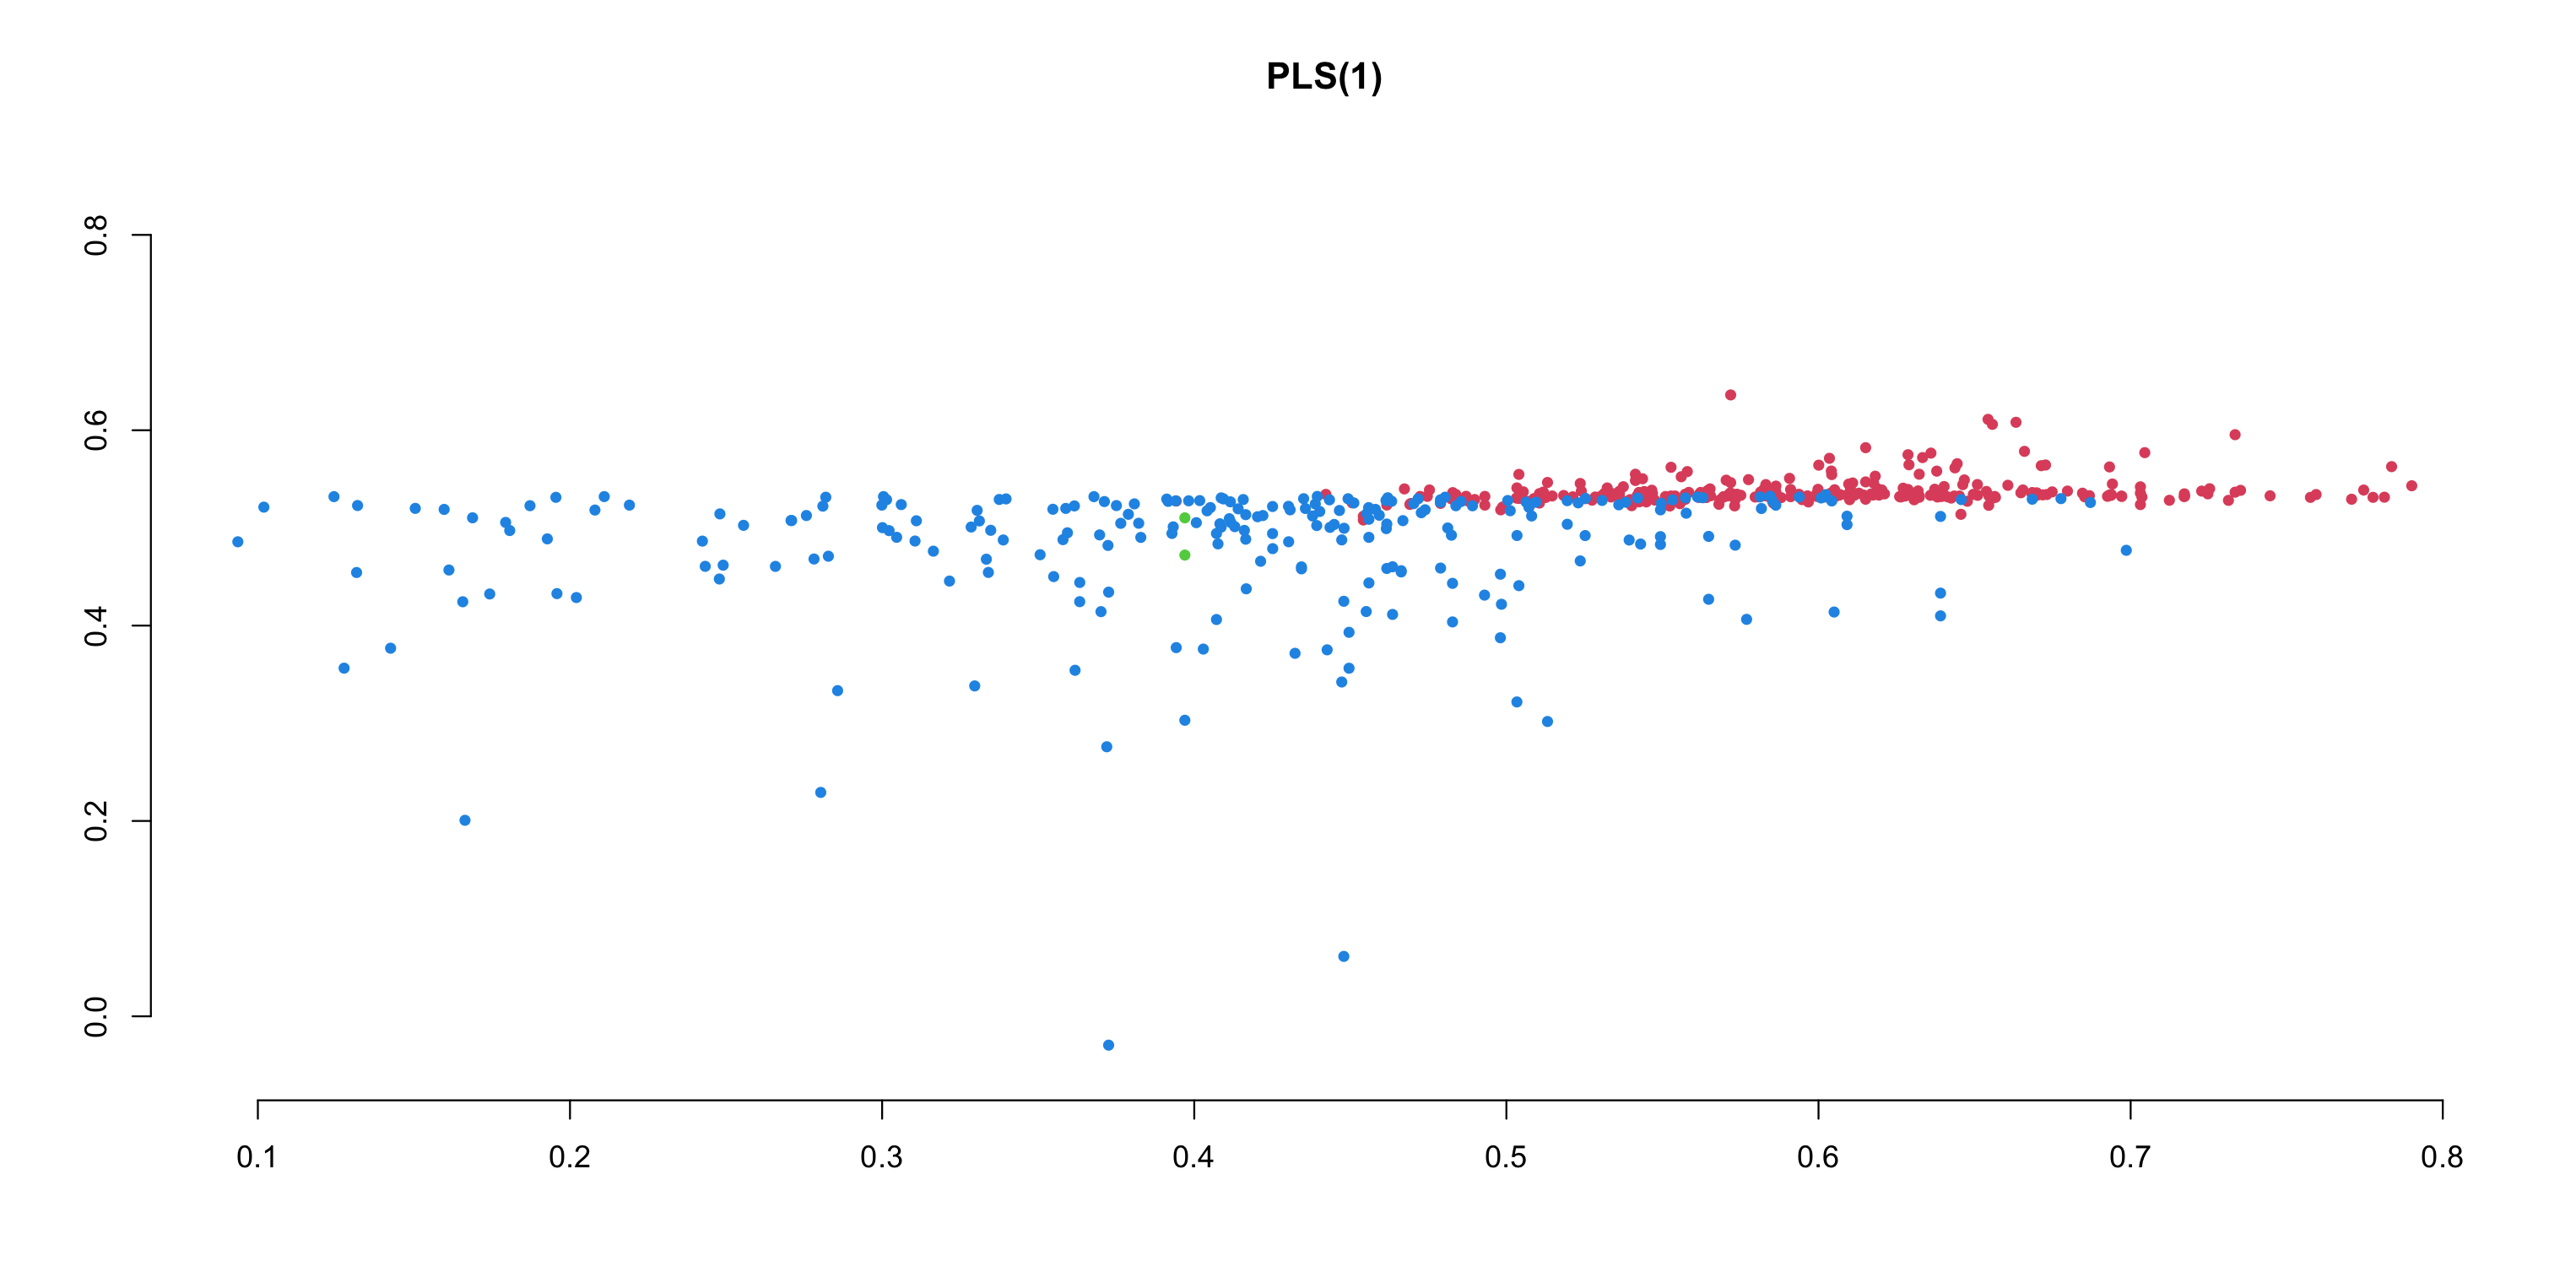

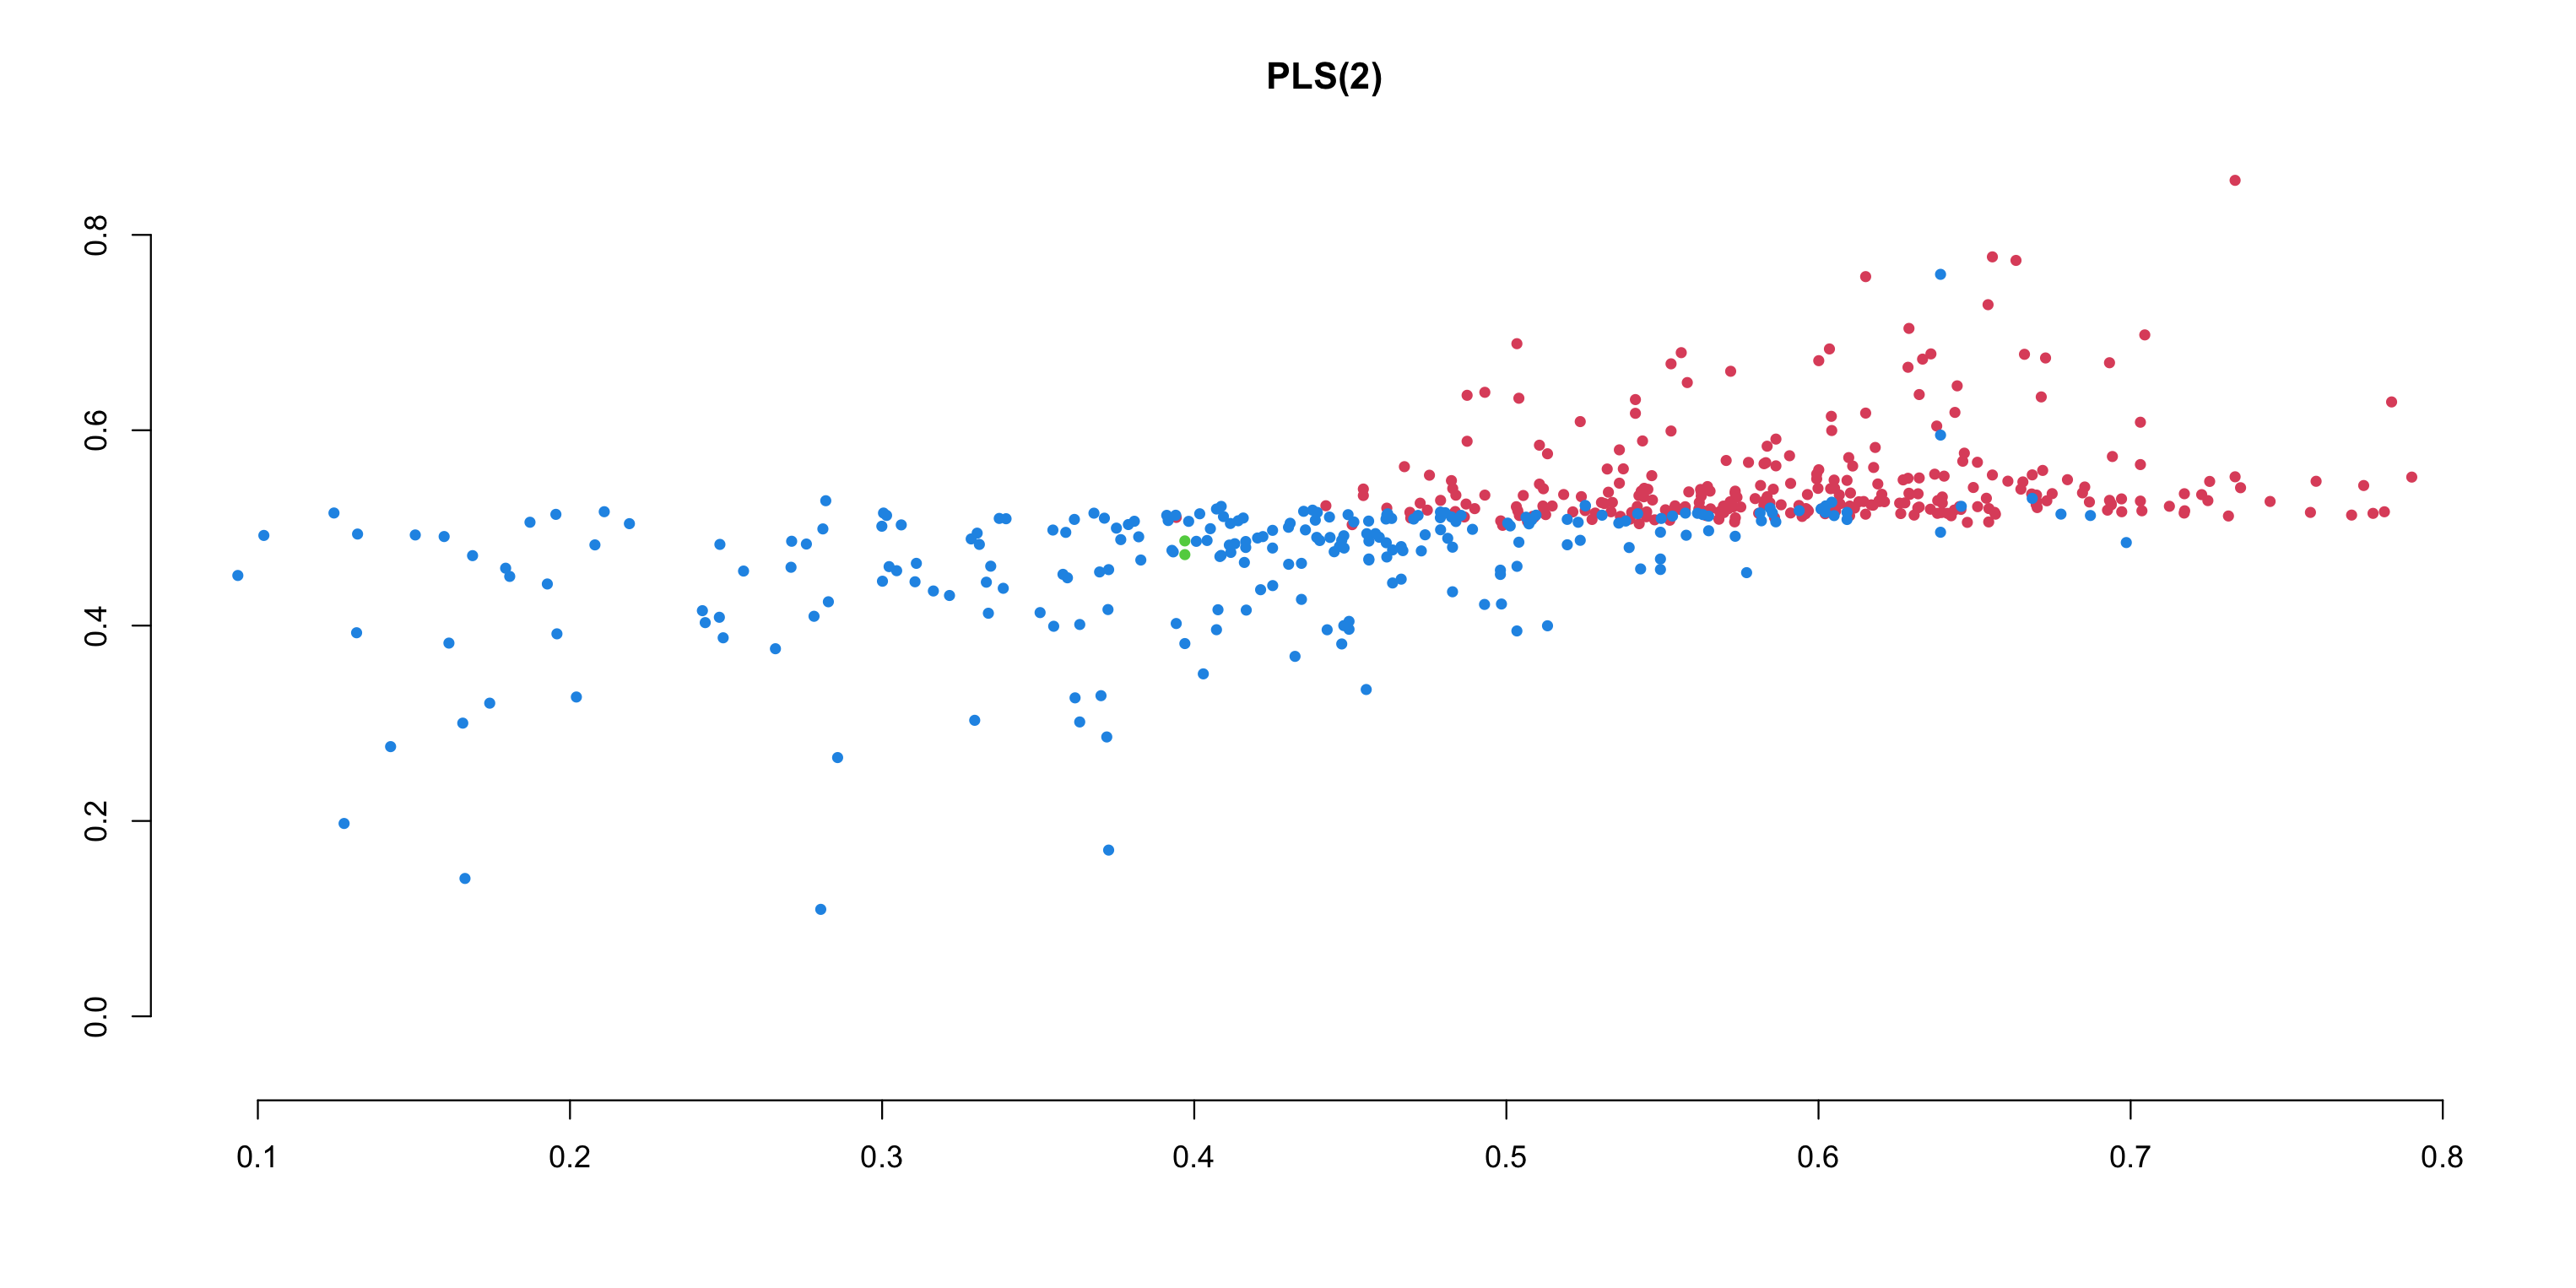

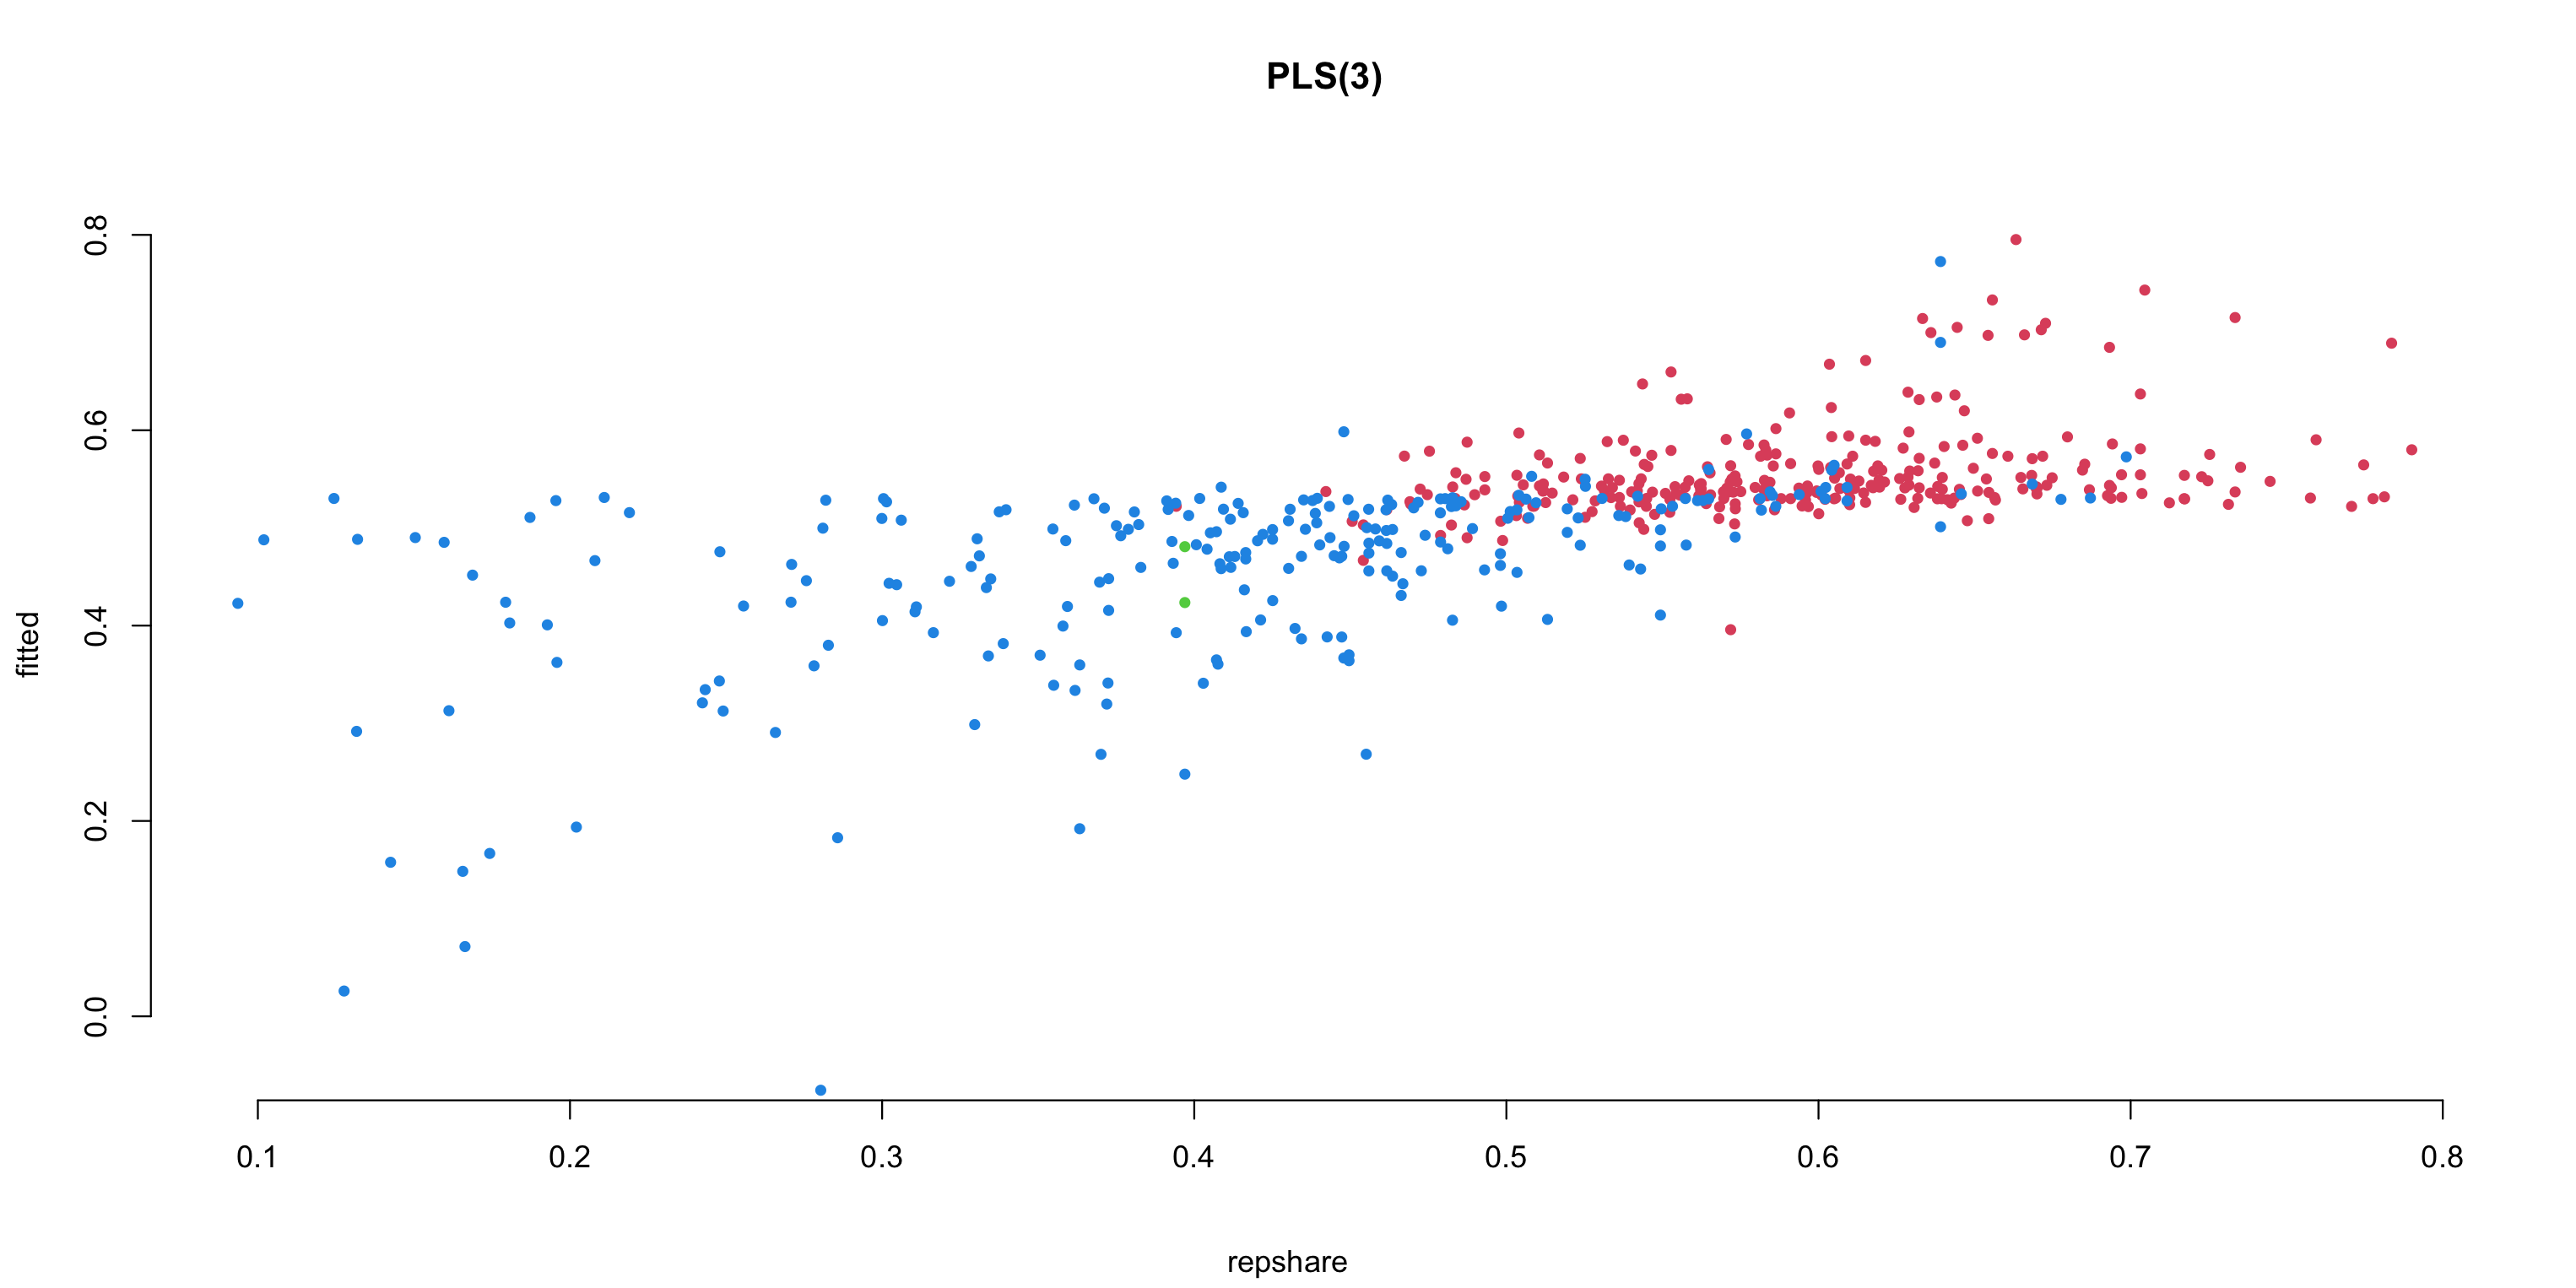

In [7]:
for(k in 1:3)
	plot(slant$y, slant$fitted[,k], ylim=c(-.05,.85), xlab="", ylab="",
	 main=sprintf("PLS(%d)", k), 
   		pch=20, col=c(4,3,2)[congress109Ideology$party], bty="n")
mtext(side=1, "repshare", outer=TRUE, line=-1.25)
mtext(side=2, "fitted", outer=TRUE, line=-1.25)

Collect out-of-sample deviance (mean squared error) from a five-fold cross-validation experiment (for each of 10 k's):

In [8]:
foldid <- sample.int(5, nrow(f), replace=TRUE)
OOS <- matrix(nrow=5, ncol=10)
for(b in 1:5){
	print(b)
	fb <- f[,colSums(f[foldid!=b,])!=0]
	for(k in 1:10){
		gpls <- pls(x=fb[foldid!=b,], y=y[foldid!=b], K=k)
		OOS[b,k] <- 
			mean( (y[foldid==b] - predict(gpls, fb[foldid==b,], K=k))^2 )
	}
}
cvm <- apply(OOS,2,mean)
cvs <- apply(OOS,2,sd)
OOS <- as.data.frame(OOS)
names(OOS) <- 1:10

[1] 1
Directions 1, done.
Directions 1, 2, done.
Directions 1, 2, 3, done.
Directions 1, 2, 3, 4, done.
Directions 1, 2, 3, 4, 5, done.
Directions 1, 2, 3, 4, 5, 6, done.
Directions 1, 2, 3, 4, 5, 6, 7, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, done.
[1] 2
Directions 1, done.
Directions 1, 2, done.
Directions 1, 2, 3, done.
Directions 1, 2, 3, 4, done.
Directions 1, 2, 3, 4, 5, done.
Directions 1, 2, 3, 4, 5, 6, done.
Directions 1, 2, 3, 4, 5, 6, 7, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, done.
[1] 3
Directions 1, done.
Directions 1, 2, done.
Directions 1, 2, 3, done.
Directions 1, 2, 3, 4, done.
Directions 1, 2, 3, 4, 5, done.
Directions 1, 2, 3, 4, 5, 6, done.
Directions 1, 2, 3, 4, 5, 6, 7, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, done.
Directions 1, 2, 3, 4, 5, 6, 7, 8, 9, done.
Directions 1, 2, 3, 4,

We can also try a lasso instead of PLS:

In [9]:
lassoslant <- cv.gamlr(congress109Counts>0, y)
B <- coef(lassoslant$gamlr)[-1,]
sort(round(B[B!=0],4))

congressional.black.caucu                 family.value 
                     -0.0839                      -0.0443 
       issue.facing.american           voter.registration 
                     -0.0324                      -0.0298 
     minority.owned.business            strong.opposition 
                     -0.0284                      -0.0264 
                 civil.right        universal.health.care 
                     -0.0259                      -0.0254 
congressional.hispanic.caucu          ohio.electoral.vote 
                     -0.0187                      -0.0183 
          american.community          public.broadcasting 
                     -0.0181                      -0.0153 
            republican.party                    tax.break 
                     -0.0138                      -0.0138 
              voting.machine                  pay.tax.cut 
                     -0.0134                      -0.0114 
     american.heritage.month                     war.iraq 
                     -0.0095                      -0.0090 
              tuskege.airmen             million.american 
                     -0.0088                      -0.0088 
             tax.cut.benefit                      bil.cut 
                     -0.0084                      -0.0083 
  feder.emergency.management                 middle.class 
                     -0.0070                      -0.0066 
international.labor.standard            medic.malpractice 
                     -0.0063                      -0.0061 
    percent.african.american        malpractice.insurance 
                     -0.0056                      -0.0055 
              oil.ga.compani                bil.fal.short 
                     -0.0019                      -0.0015 
          provisional.ballot            armenian.genocide 
                     -0.0006                      -0.0001 
     energy.natural.resource             repeal.death.tax 
                      0.0006                       0.0014 
               washington.dc                    time.move 
                      0.0015                       0.0018 
                   time.vote                 food.program 
                      0.0019                       0.0027 
   committe.foreign.relation                  highway.bil 
                      0.0030                       0.0030 
         reform.class.action                     pass.bil 
                      0.0037                       0.0038 
                  natural.ga               district.judge 
                      0.0039                       0.0045 
      private.property.owner        class.action.fairness 
                      0.0046                       0.0047 
              feder.spending              serving.country 
                      0.0049                       0.0053 
             economy.growing                    death.tax 
                      0.0062                       0.0066 
    protect.private.property                  farm.bureau 
                      0.0071                       0.0073 
                  raise.taxe                 class.action 
                      0.0078                       0.0078 
               illegal.alien               percent.growth 
                      0.0079                       0.0083 
         illegal.immigration                   global.war 
                      0.0087                       0.0098 
                look.forward                   war.terror 
                      0.0099                       0.0114 
            private.property               action.lawsuit 
                      0.0133                       0.0142 
                human.embryo        million.illegal.alien 
                      0.0226                       0.0328

Voila, compare:

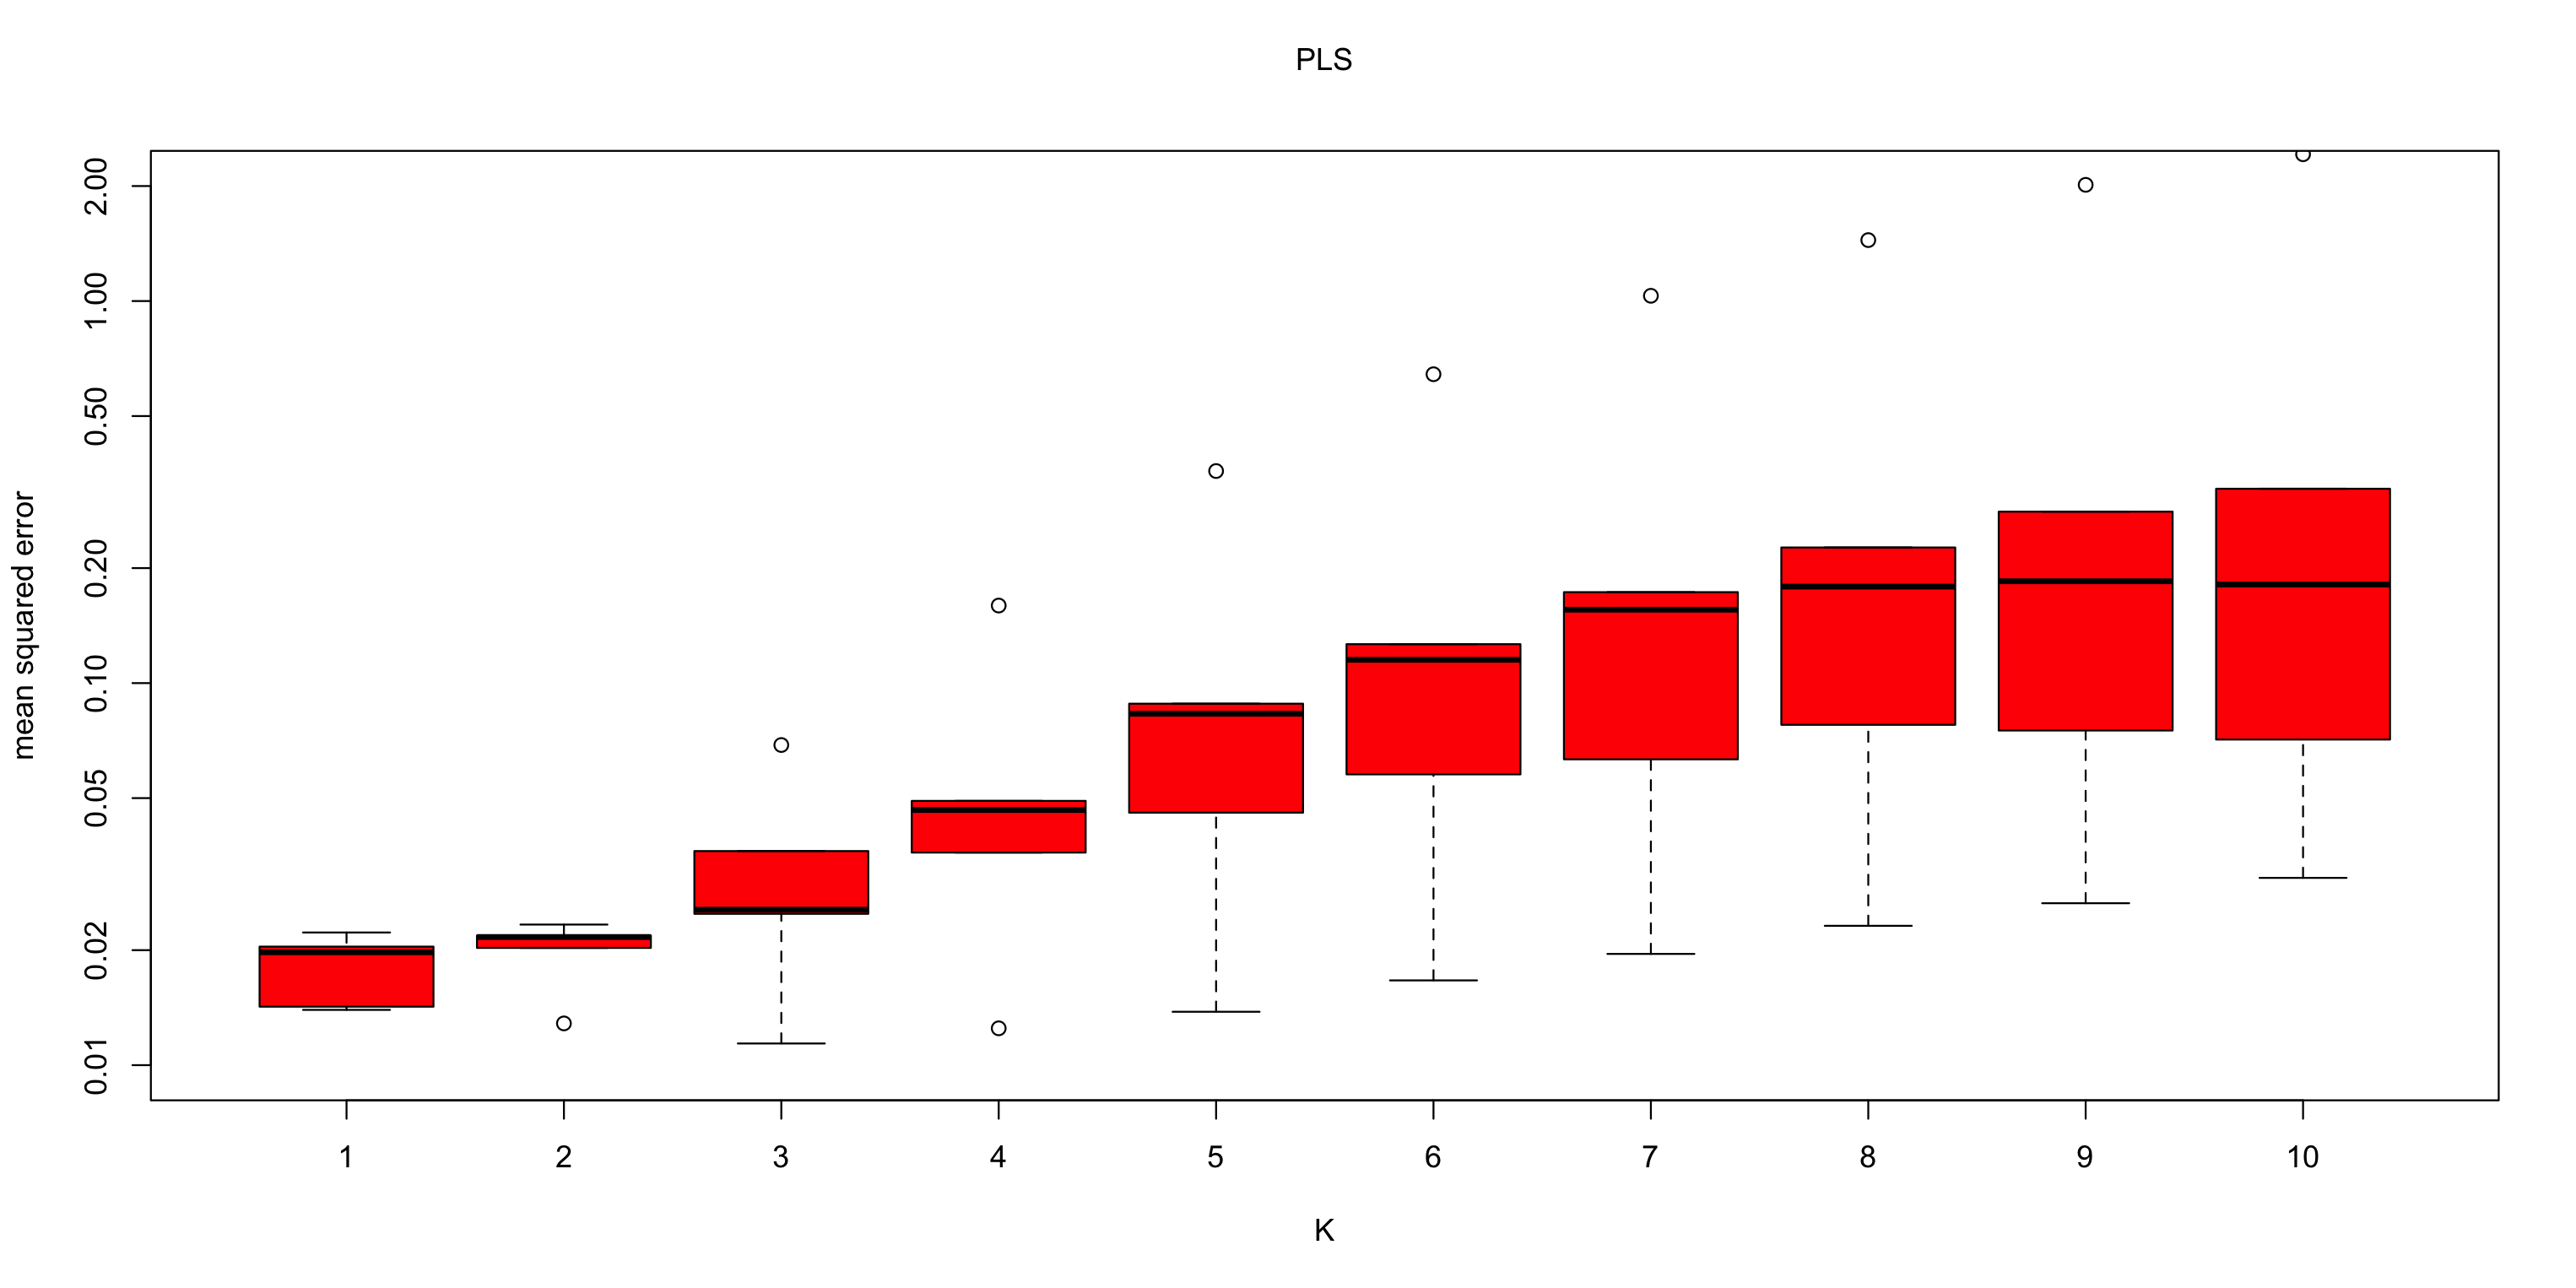

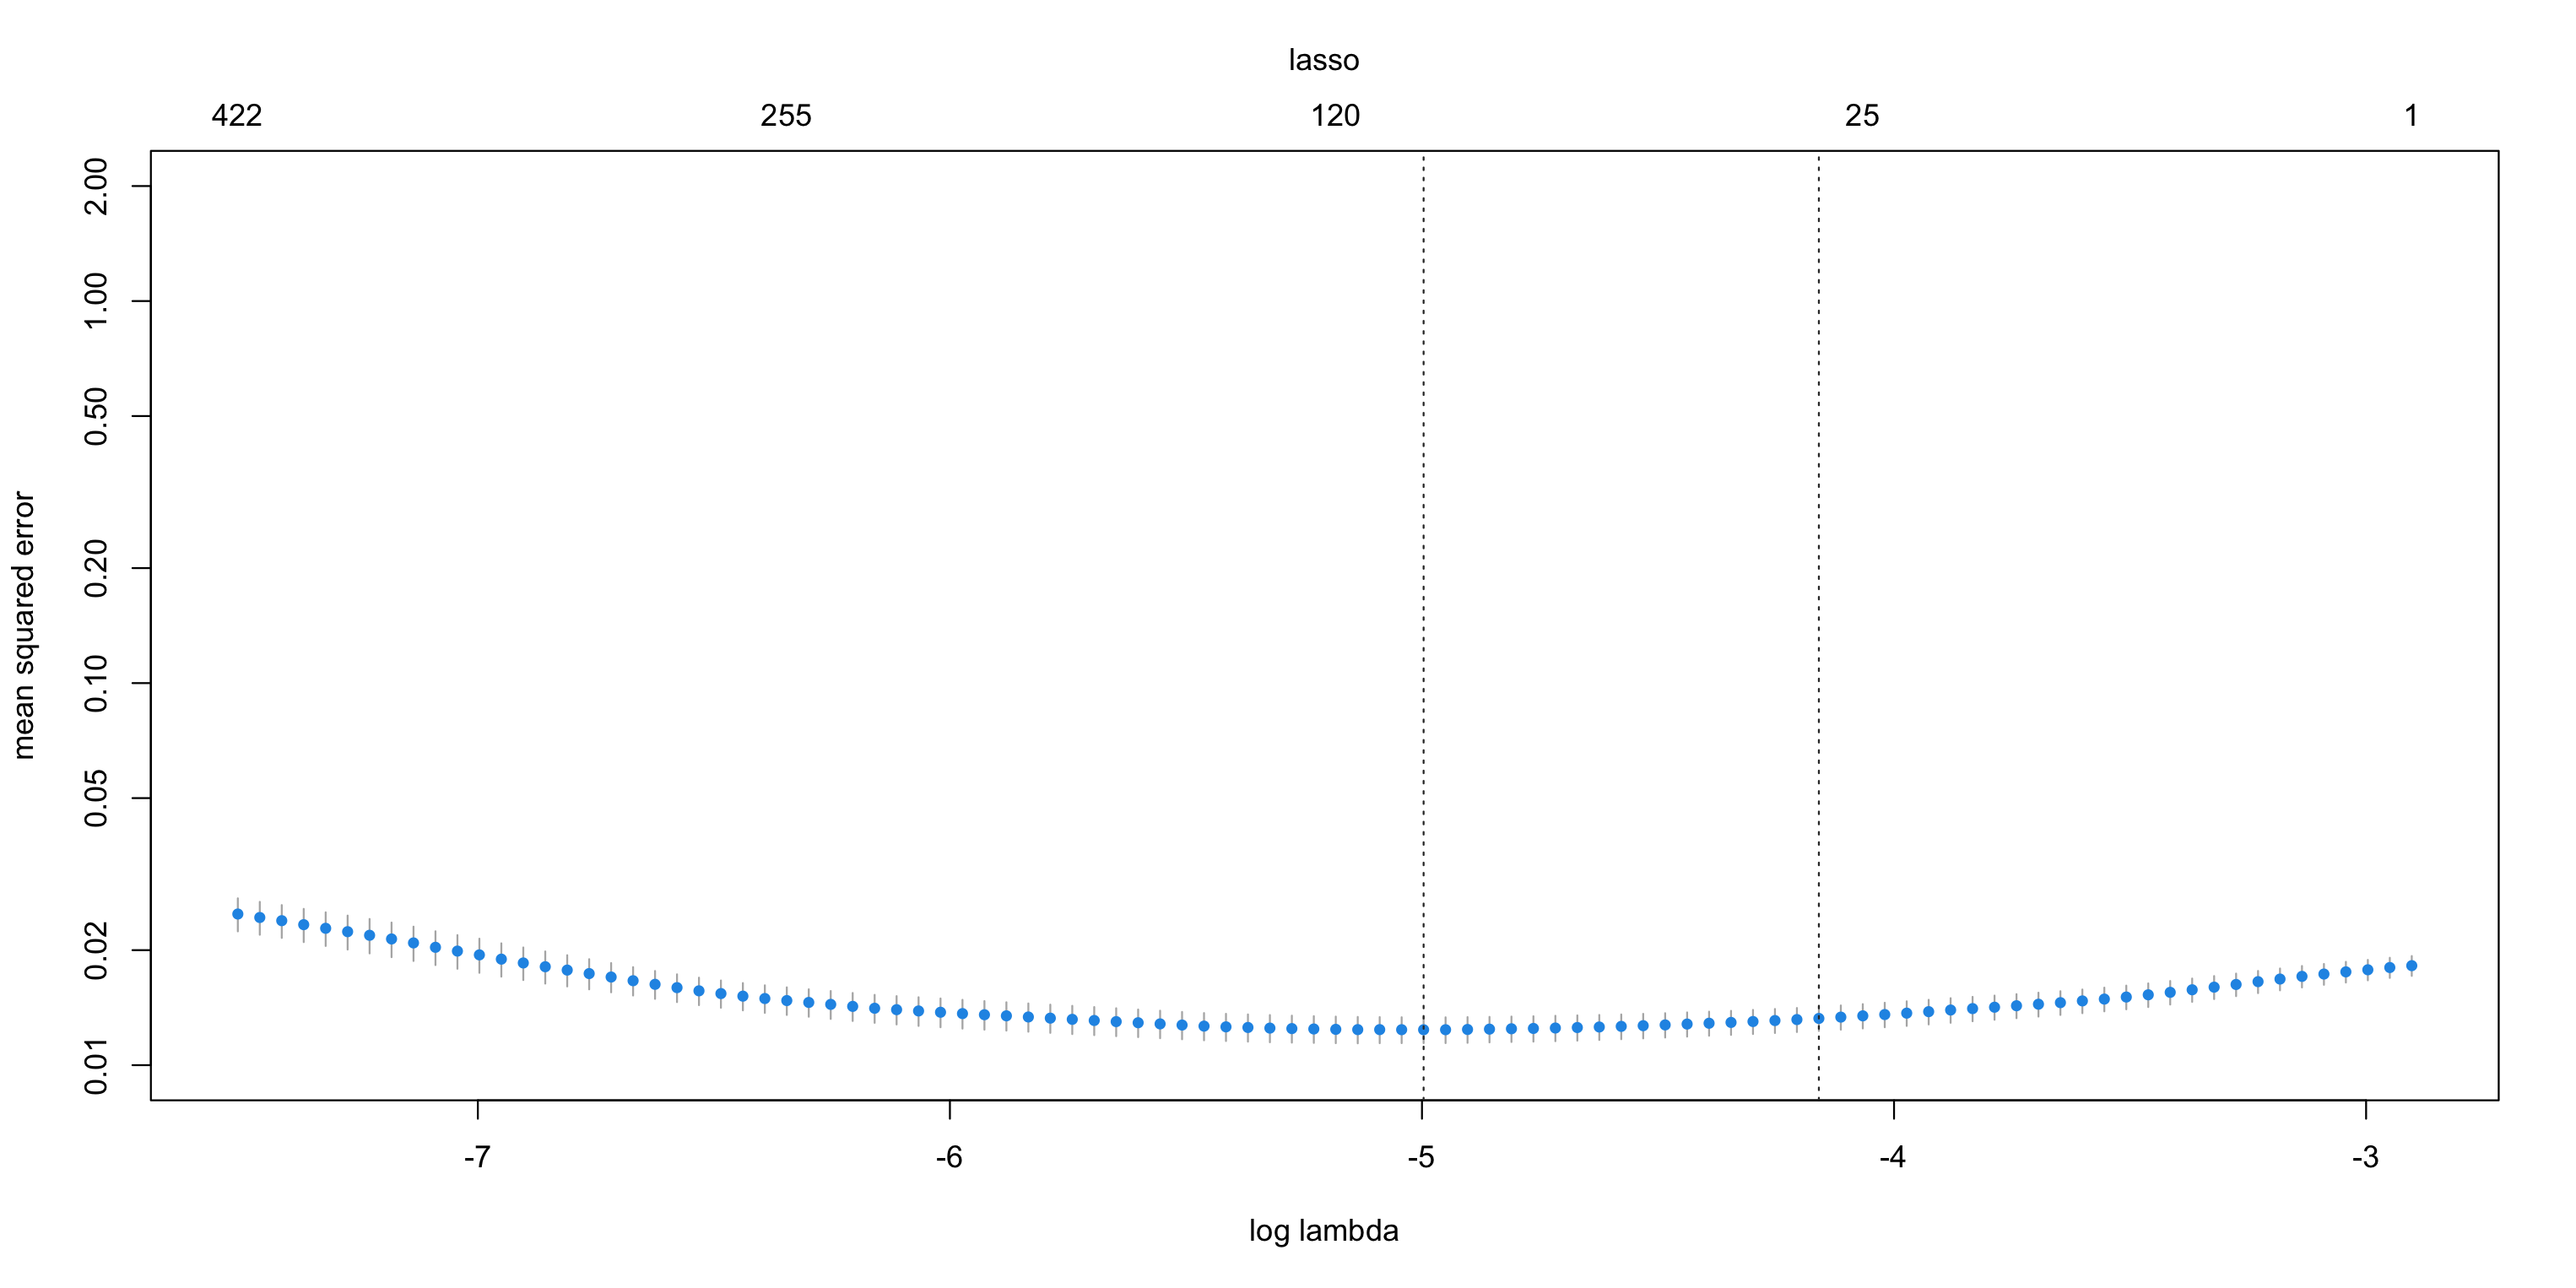

In [10]:
boxplot(OOS, ylab="mean squared error", xlab="K", col="red", log="y", main="", 
	ylim=c(0.01,2))
mtext(side=3, "PLS", line=2)
plot(lassoslant, log="y", main="", ylim=c(0.01,2)) 
mtext(side=3, "lasso", line=2)

# Topic models

Data comes from an older review site, `we8there`:

In [11]:
data(we8there)

DTM:

In [12]:
x <- we8thereCounts
x[1,x[1,]!=0]

even though larg portion  mouth water     red sauc    babi back     back rib 
           1            1            1            1            1            1 
chocol mouss veri satisfi 
           1            1

Let's run a PCA (wait patiently) and grab four factors:

In [13]:
pca <- prcomp(x, scale=TRUE)
v <- predict(pca)[,1:4]

Experiment with a bottom-up look:

In [14]:
tail(sort(pca$rotation[,1]))
head(sort(pca$rotation[,4]))

food great     staff veri     excel food high recommend     great food 
   0.007386860    0.007593374    0.007629771    0.007821171    0.008503594 
    food excel 
   0.008736181

pizza like   thin crust  thin crispi    deep dish  crust pizza italian beef 
  -0.1794166   -0.1705301   -0.1551877   -0.1531820   -0.1311161   -0.1250104

Figure 8.5 plots the estimated PC1 score against the raw ratings in the data for a top-down view:

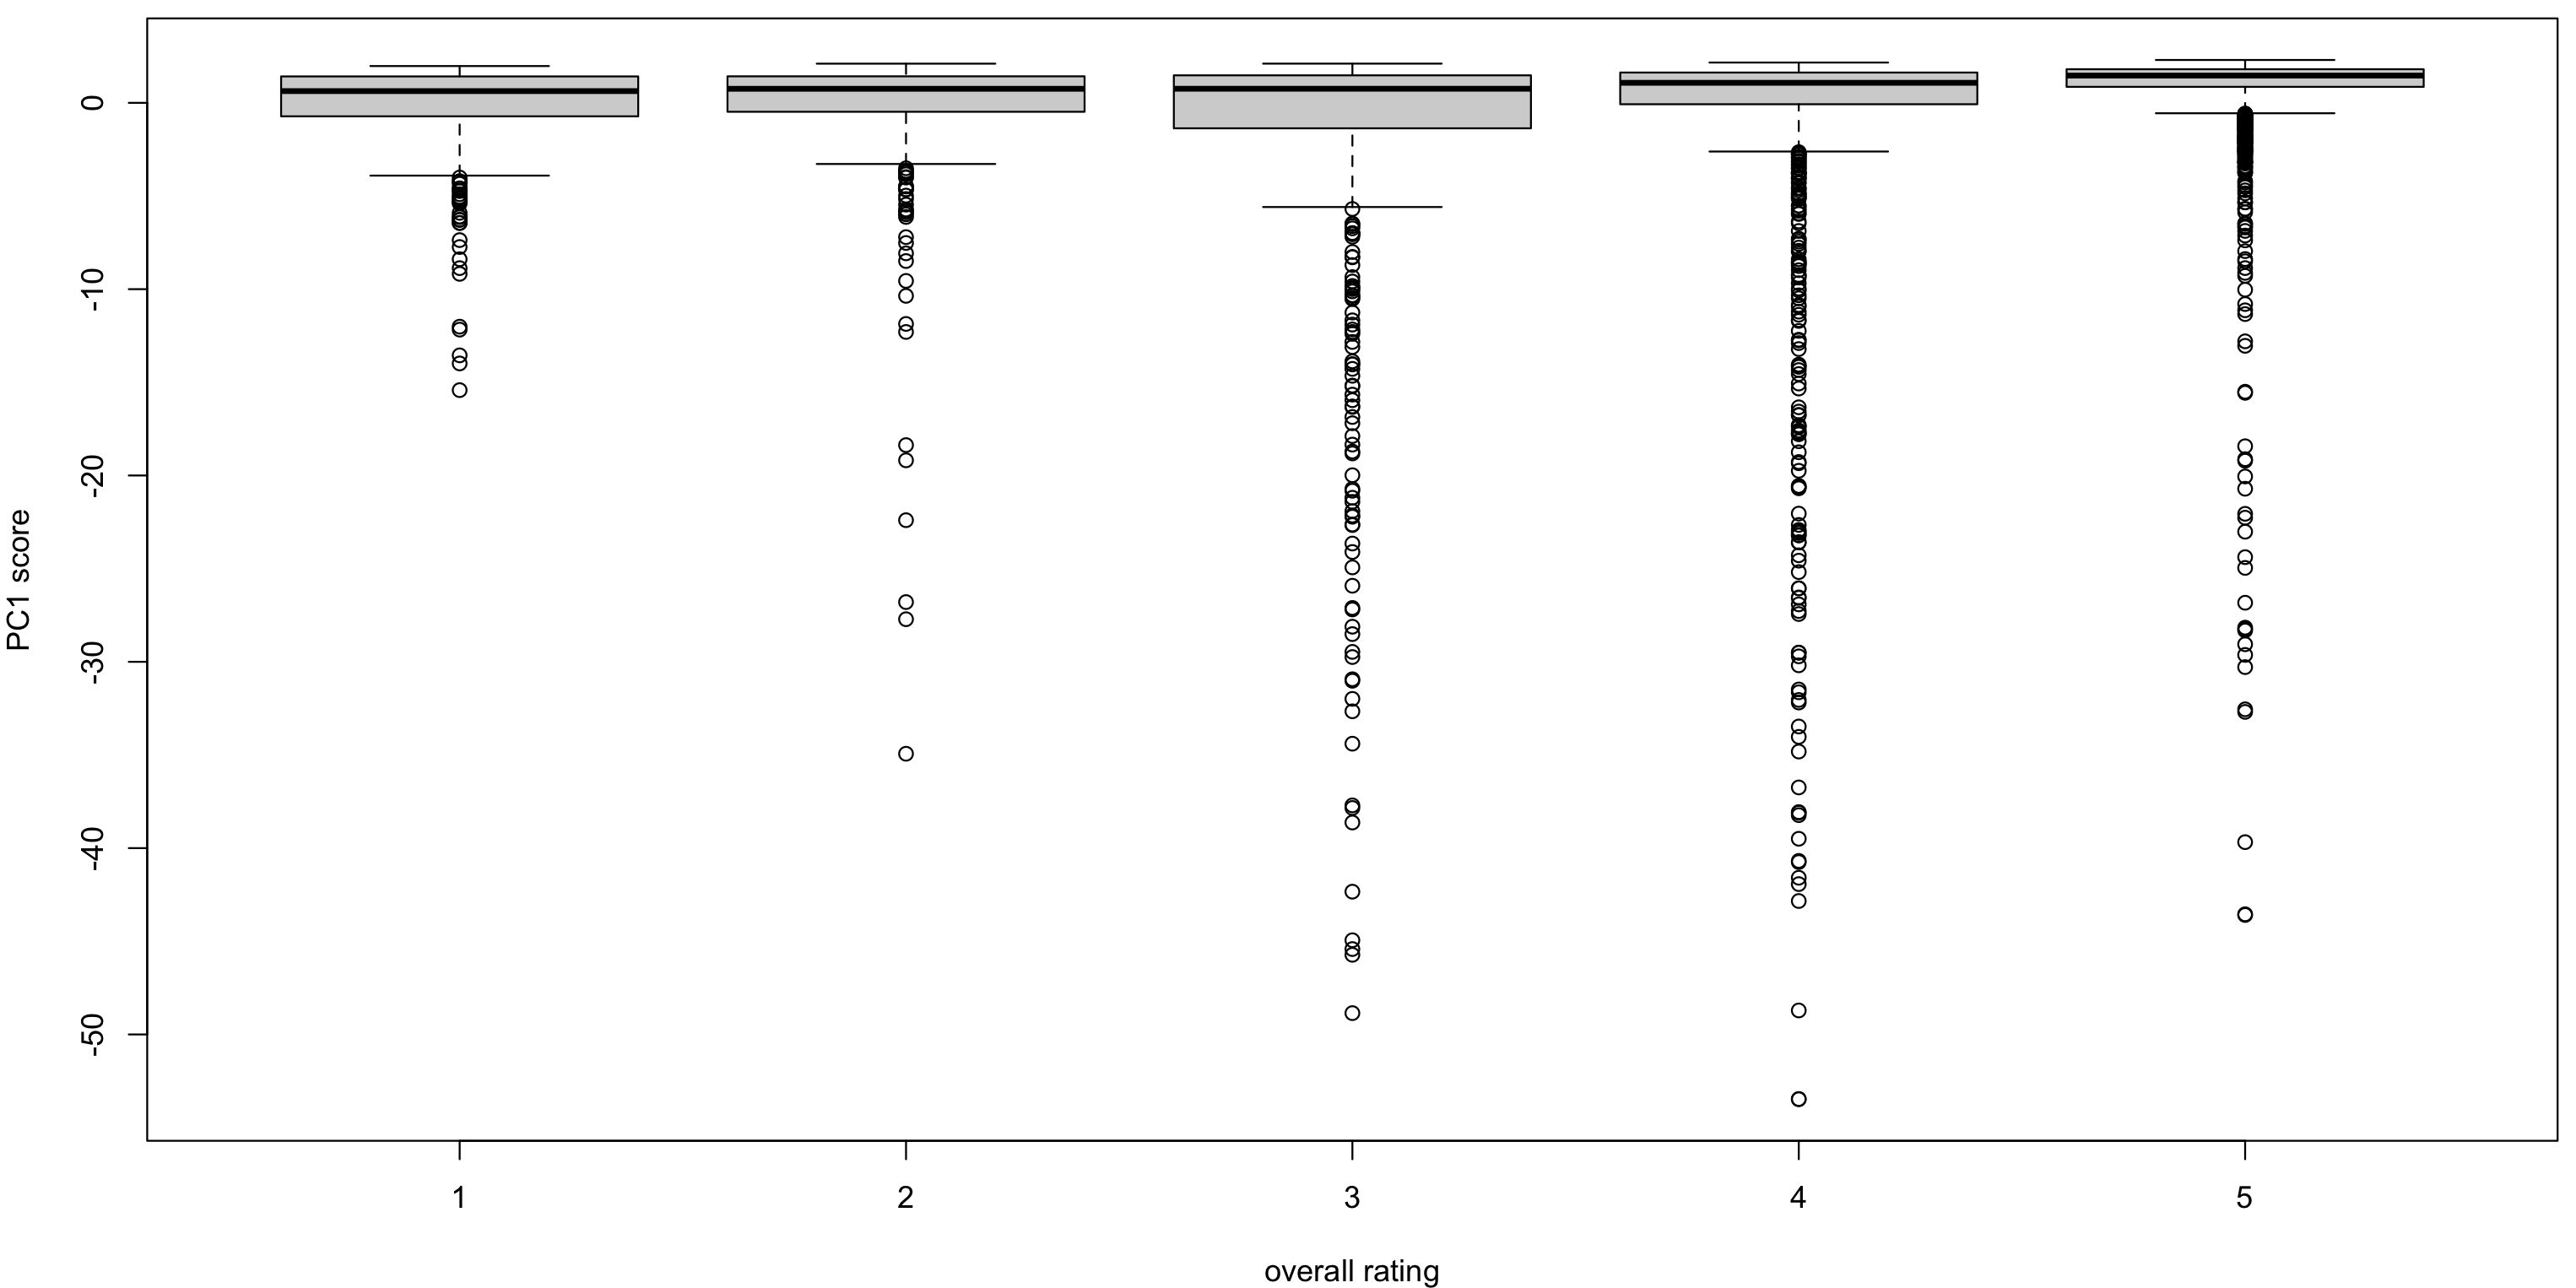

In [15]:
par(mai=c(.8,.8,.1,.1))
boxplot(v[,1] ~ we8thereRatings$Overall, xlab="overall rating", ylab="PC1 score")

The `topics` function will come from yet another library, and actually one Taddy removed from the standard repository. To stick to the book's notation, let's not replace it with our own functions, instead load his original package from his GitHub site.

In [16]:
#install.packages("devtools")
#devtools::install_github("r-lib/devtools")
#library(devtools)
#install_github("TaddyLab/maptpx")

In [17]:
library(maptpx)

Loading required package: slam



This is a bit tedious, but we'll need to convert the data from a `Matrix` to a `slam` `simple_triplet_matrix`.

In [18]:
x <- as.simple_triplet_matrix(we8thereCounts)

To fit, just give `topics` the counts, number of topics K, and any other arguments.

In [19]:
tpc <- topics(x,K=10) 


Estimating on a 6166 document collection.
Fitting the 10 topic model.
log posterior increase: 4444.6, 462.7, 101.1, 40.2, 41.4, 56.5, 25.8, 15.4, 17.3, 10, 7.5, 11.1, 8.6, 8.1, 5, 3.2, 9.7, 7.9, 3.3, 7.4, 5.3, 3.5, 3.5, 5.4, 9, 5.2, 8.5, 11.3, 10.2, 11.9, 21.2, 9.7, 8.3, 15.9, 8.2, 5.6, 3.3, 8.3, 6.8, 7.6, 14.5, 7.7, 4.2, 6.2, 2.9, 2.2, 3.3, 2, 3.4, 1.7, 3.8, 5.2, 1.4, 1.9, 1.7, 2, 2.9, 1.9, 2, 1.1, 0.9, 1.2, 0.8, 12.5, 0.8, 2, 2.2, 1.9, 1.5, 0.2, 0.2, 0.4, 0.2, done.


## Choosing the number of topics

If you supply a vector of topic sizes, the command uses a Bayes factor to choose the best-fitting size.
 (BF is like exp(-BIC), so we choose the biggest BF.)
The algorithm stops if BF drops twice in a row.

In [20]:
tpcs <- topics(x,K=5*(1:5), verb=1) # it chooses 10 topics 


Estimating on a 6166 document collection.
Fit and Bayes Factor Estimation for K = 5 ... 25
log posterior increase: 2854.4, 321.3, 85, 37.3, 84, 21.7, 18.5, 7, 17.3, 5.7, 4.4, 6.5, 5.5, 12, 7, 3.6, 2.7, 2.7, 3.7, 6.3, 3.9, 3.1, 3, 2.3, 3.7, 4.1, 2.7, 3.3, 1.4, 1.9, 2.1, 6.8, 16, 5, 15.2, 7.5, 9.7, 12.6, 4.4, 5.8, 5.4, 4.2, 5.3, 4.4, 7.9, 10.8, 24.2, 15.7, 12.4, 12.9, 11.6, 13.4, 6.9, 6.1, 5.1, 4.3, 2.2, 2.7, 1.3, 2, 1.3, 3.5, 2.2, 1.3, 3, 1.9, 0.9, 1.9, 1.4, 1, 0.9, 0.8, 0.8, 0.3, 0.5, 0.4, 0.5, 0.2, 0.2, 0.3, 0.2, 2.4, 0.8, 1.2, 0.2, 0.2, 0.1, done.
log BF( 5 ) = 79606.54
log posterior increase: 4626.2, 199.7, 54.4, 25.5, 15.8, 13.5, 6.1, 5.8, 5.8, 3.6, 4.2, 5.4, 2, 1.7, 3.4, 0.9, 0.7, 0.6, 0.7, 0.3, 1.6, 0.5, 0.5, 1.1, 0.4, 0.1, 0.4, 1.1, 1.1, 0.3, 0.4, 1.2, 0.4, 0.3, 0.1, 0.3, done.
log BF( 10 ) = 87552.6
log posterior increase: 3445.7, 176.6, 55.4, 23.1, 12, 9.8, 6.7, 7, 6.3, 2.8, 1.7, 1.7, 4, 3.1, 1.4, 0.7, 2.4, 0.9, 0.7, 0.8, 0.3, 1.6, 0.6, 0.3, 0.5, 0.3, 0.2, 0.8, 0.2, 0.3, 0.3,

## Interpretation

`summary` prints the top n words for each topic,
 under ordering by 'topic over aggregate' lift:
    the topic word probability over marginal word probability.

In [21]:
summary(tpcs, n=10) 


Top 10 phrases by topic-over-null term lift (and usage %):

[1] 'food great', 'great food', 'veri good', 'great servic', 'food veri', 'food excel', 'veri nice', 'veri friend', 'excel food', 'excel servic' (14.3) 
[2] 'best italian', 'high recommend', 'italian food', 'list extens', 'staff friend', 'mexican food', 'wait staff', 'don miss', 'food wonder', 'authent mexican' (11.7) 
[3] 'open daili', 'until pm', 'pm friday', 'monday through', 'enough share', 'select includ', 'fresh veget', 'dinner buffet', 'dine spot', 'highlight menu' (10.5) 
[4] 'over minut', 'arriv after', 'never go', 'go back', 'flag down', 'anoth minut', 'ask manag', 'wait minut', 'after minut', 'wait anoth' (10.1) 
[5] 'don wast', 'never return', 'wast time', 'one worst', 'here sever', 'sever time', 'tourist trap', 'small portion', 'time money', 'veri bland' (9.6) 
[6] 'take out', 'wait go', 'can get', 'can wait', 'everi time', 'well worth', 'worth wait', 'sushi chef', 'sushi bar', 'home cook' (9.4) 
[7] 'enjoy dine'

This will promote rare words that with high in-topic probability.

Alternatively, we can look at words ordered by simple in-topic probability.
The topic-term probability matrix is called 'theta', 
and each column is a topic.
We can use these to rank terms by probability within topics.

In [22]:
rownames(tpcs$theta)[order(tpcs$theta[,1], decreasing=TRUE)[1:10]]
rownames(tpcs$theta)[order(tpcs$theta[,2], decreasing=TRUE)[1:10]]
rownames(tpcs$theta)[order(tpcs$theta[,3], decreasing=TRUE)[1:10]]

[1] "veri good"    "great food"   "food great"   "great place"  "veri friend" 
 [6] "veri nice"    "good food"    "great servic" "food excel"   "servic great"

[1] "high recommend"  "dine experi"     "wait staff"      "wine list"      
 [5] "one best"        "mexican food"    "italian food"    "italian restaur"
 [9] "staff friend"    "make feel"

[1] "san francisco" "salad bar"     "mash potato"   "crab cake"    
 [5] "restaur locat" "main cours"    "lunch dinner"  "wide varieti" 
 [9] "soup salad"    "reason price"

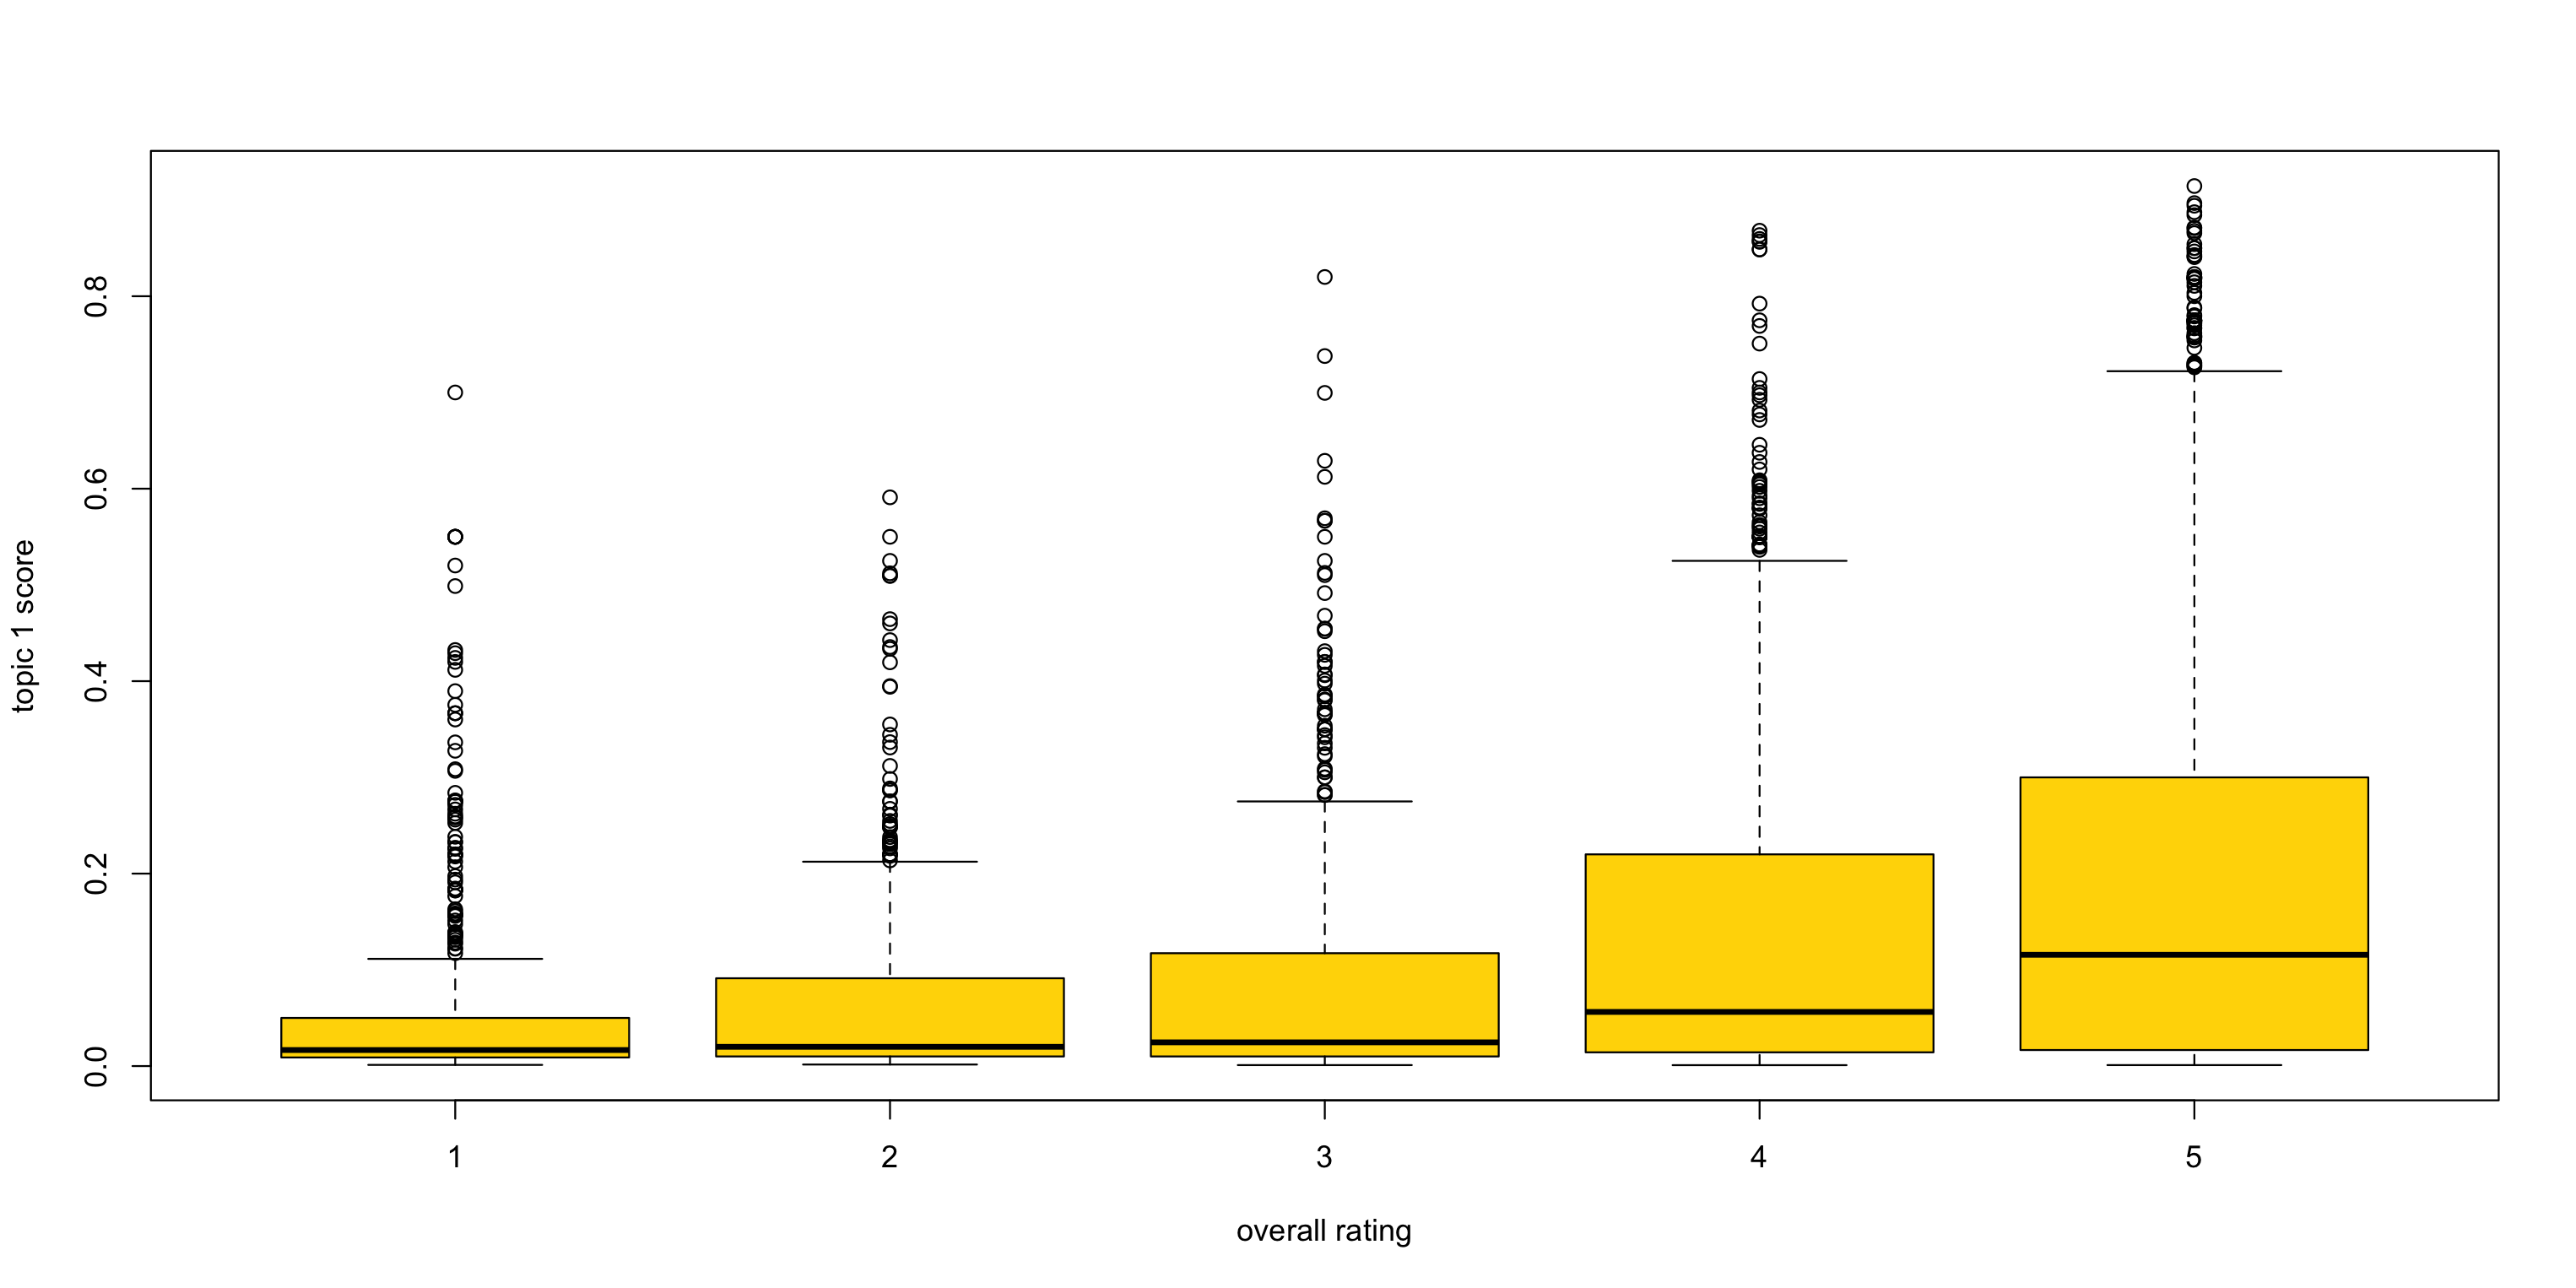

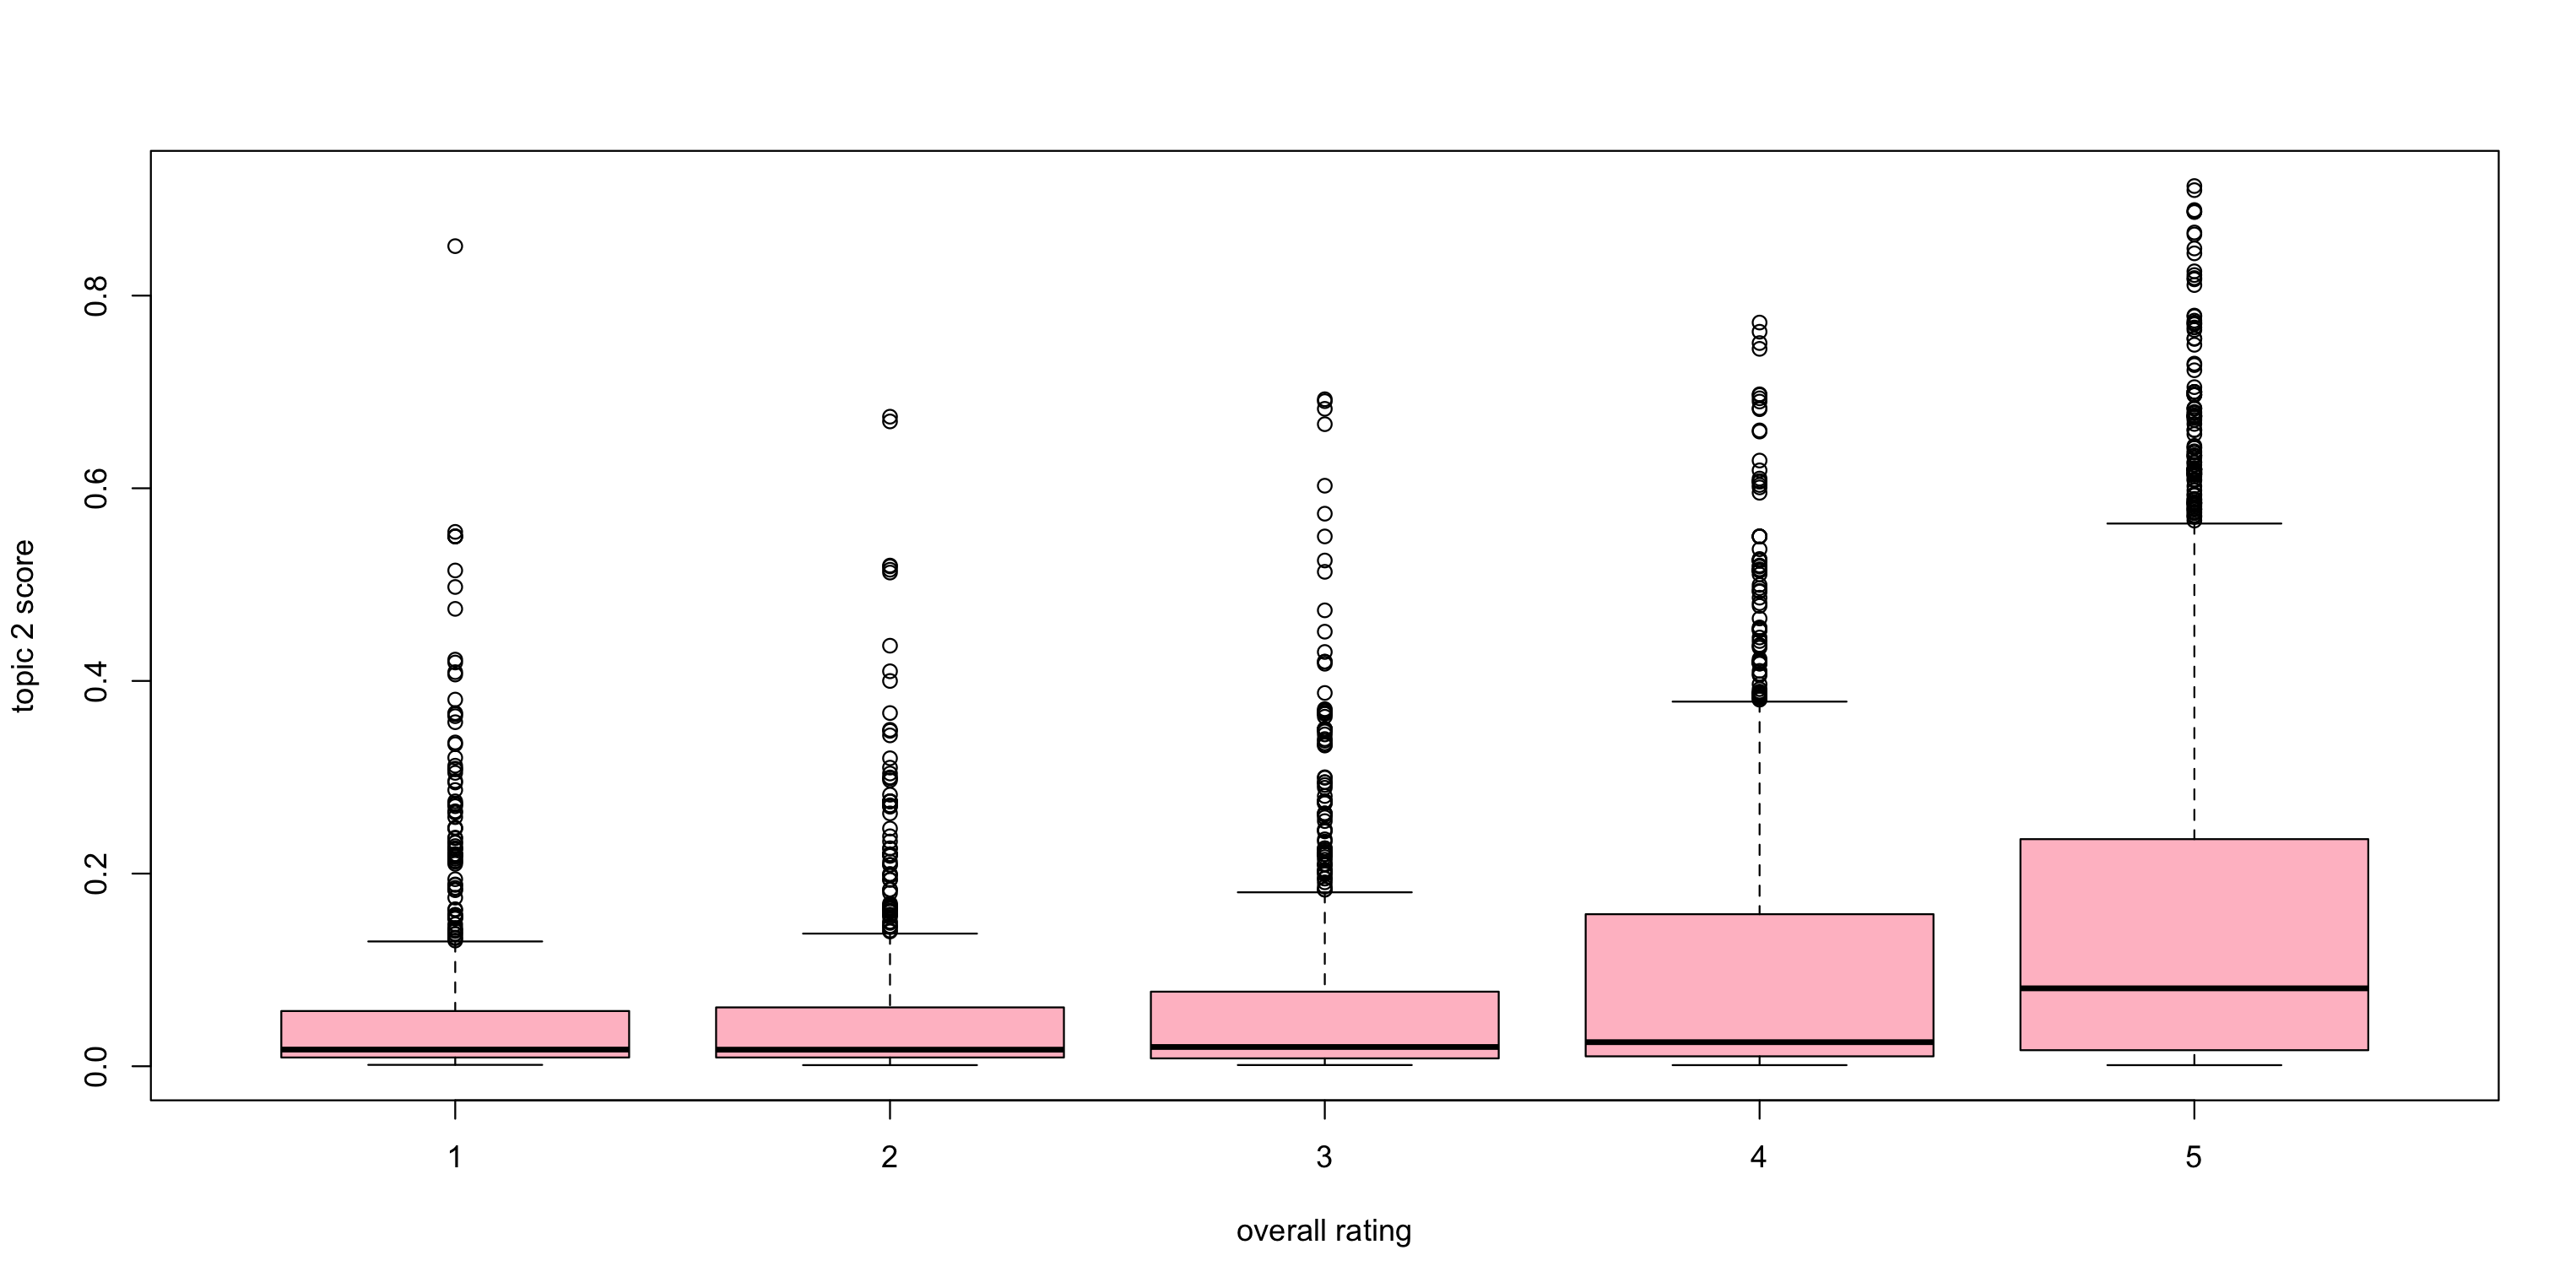

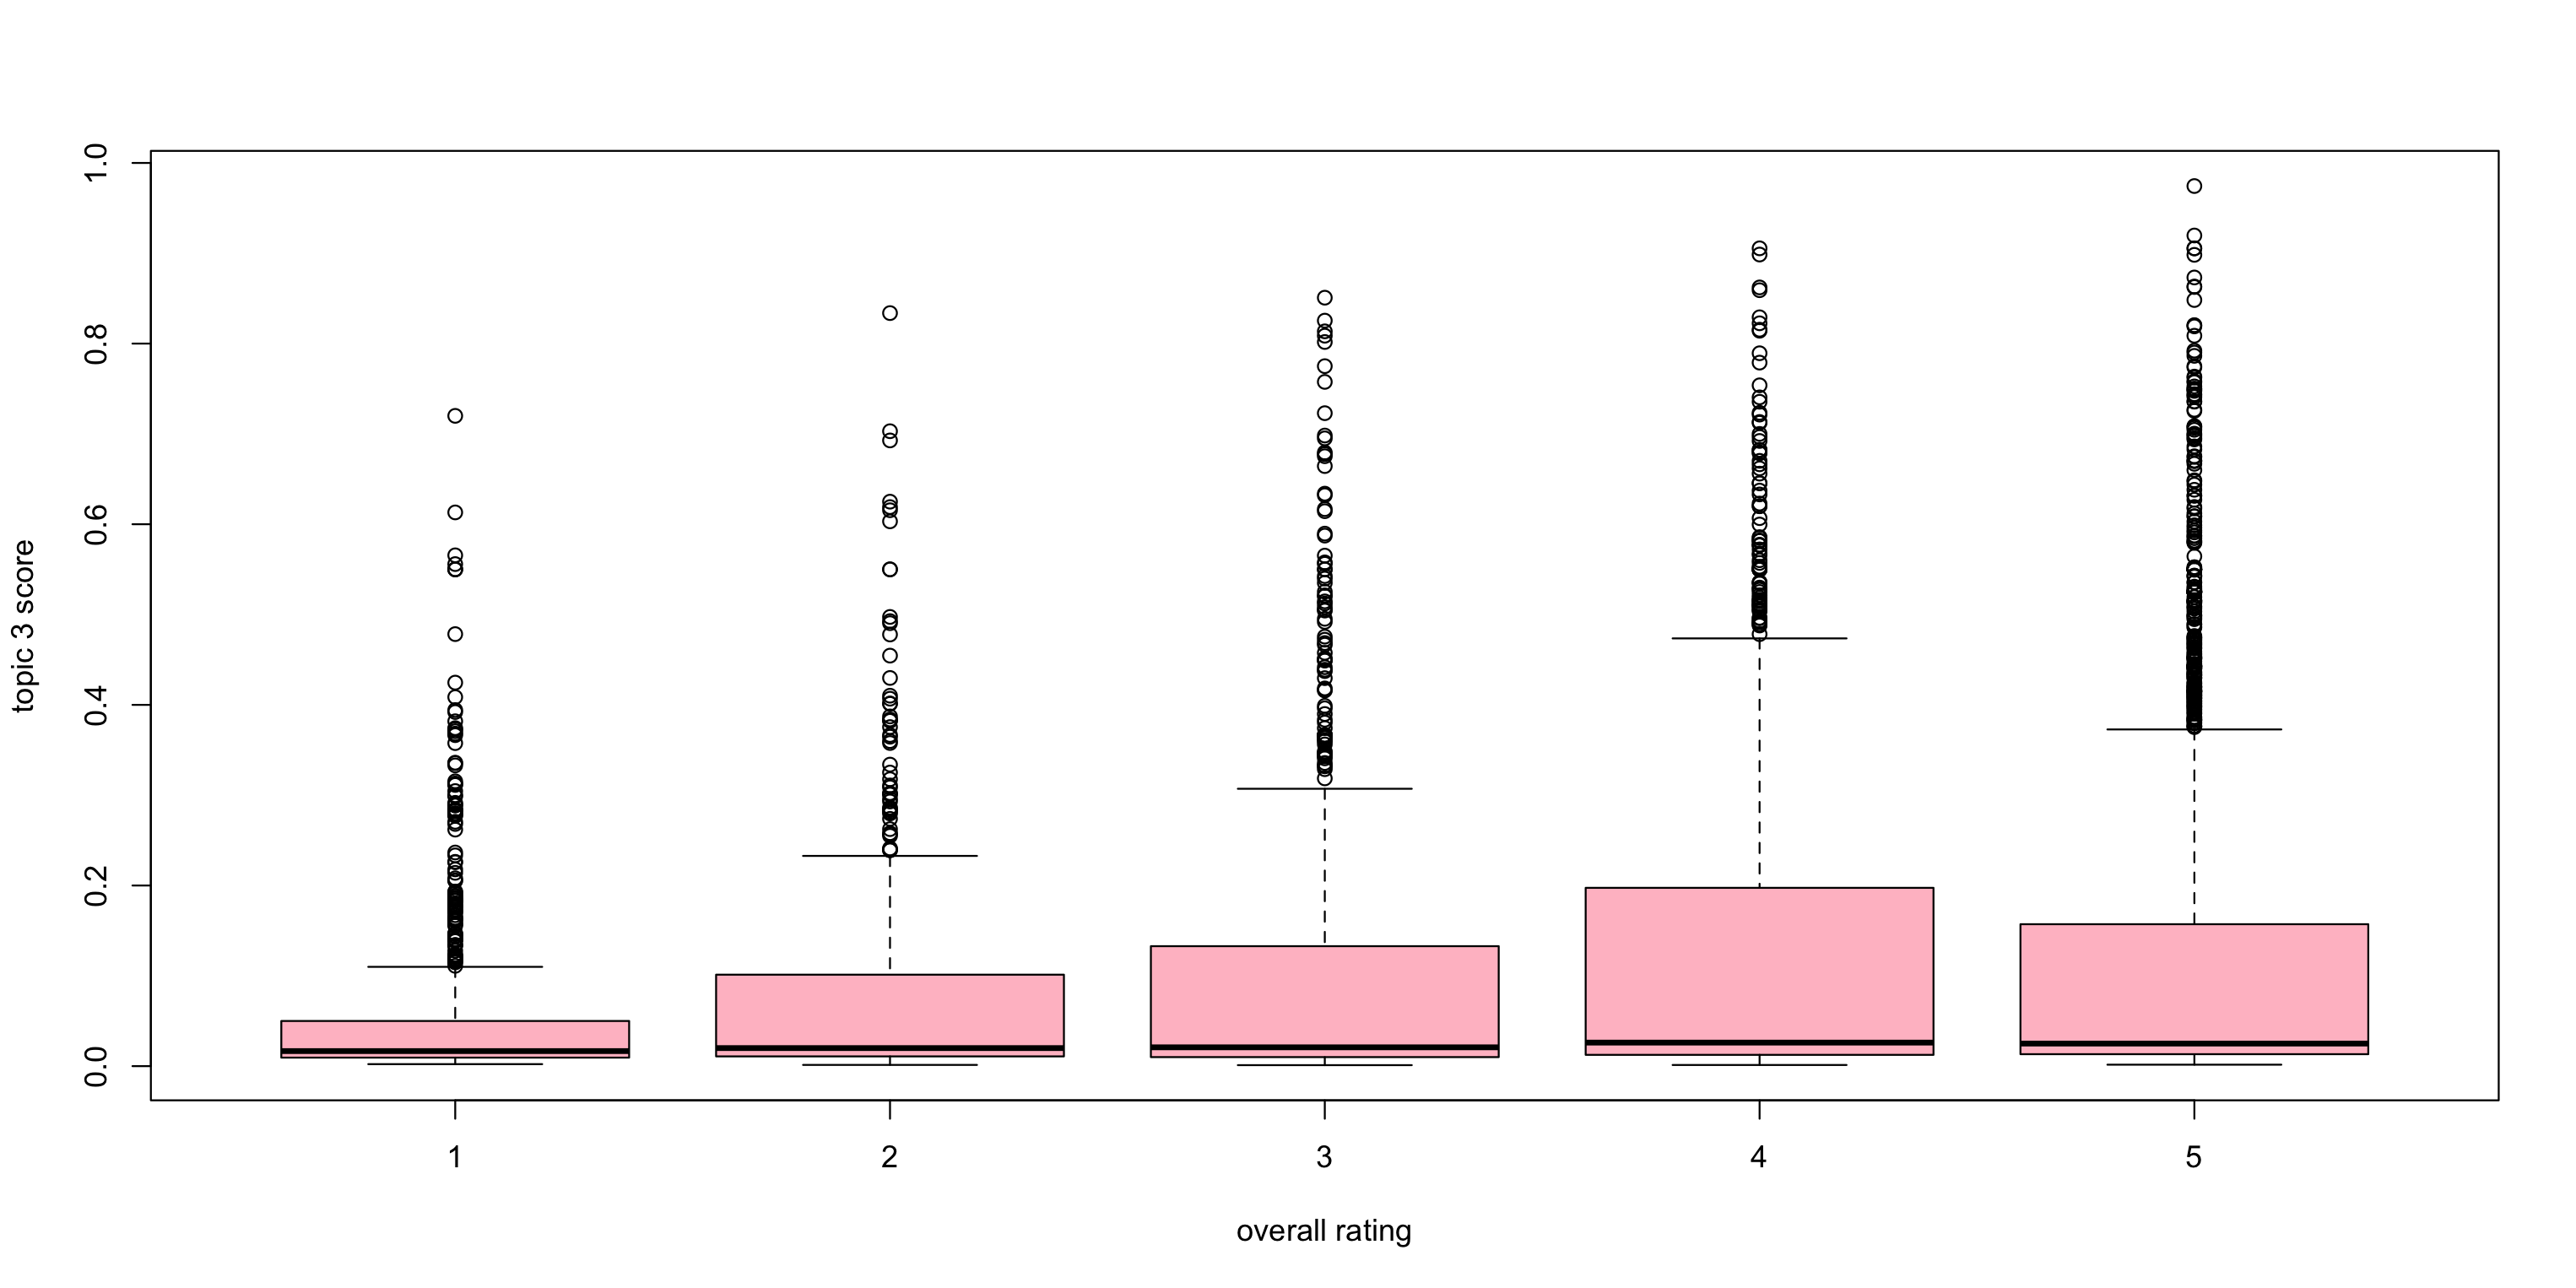

In [23]:
boxplot(tpcs$omega[,1] ~ we8thereRatings$Overall, col="gold", xlab="overall rating", ylab="topic 1 score")
boxplot(tpcs$omega[,2] ~ we8thereRatings$Overall, col="pink", xlab="overall rating", ylab="topic 2 score")
boxplot(tpcs$omega[,3] ~ we8thereRatings$Overall, col="pink", xlab="overall rating", ylab="topic 3 score")

Interpret the relationship between topics and overall rating:

`omega` is the n x K matrix of document topic weights,
i.e., how much of each document is from each topic.
We'll regress overall ratings onto it.

In [24]:
library(gamlr)
stars <- we8thereRatings[,"Overall"]
tpcreg <- gamlr(tpcs$omega, stars, lmr=1e-3)

Calculate the number of stars more or less for moving up 10% weight in that topic:

In [25]:
round(coef(tpcreg)[-1,]*0.1,1)

1    2    3    4    5    6    7    8    9   10 
 0.1  0.1  0.0 -0.3 -0.4  0.0  0.1  0.1 -0.1 -0.1

In [26]:
regtopics.cv <- cv.gamlr(tpcs$omega, stars, lmr=1e-3)
regwords.cv <- cv.gamlr(we8thereCounts, stars)

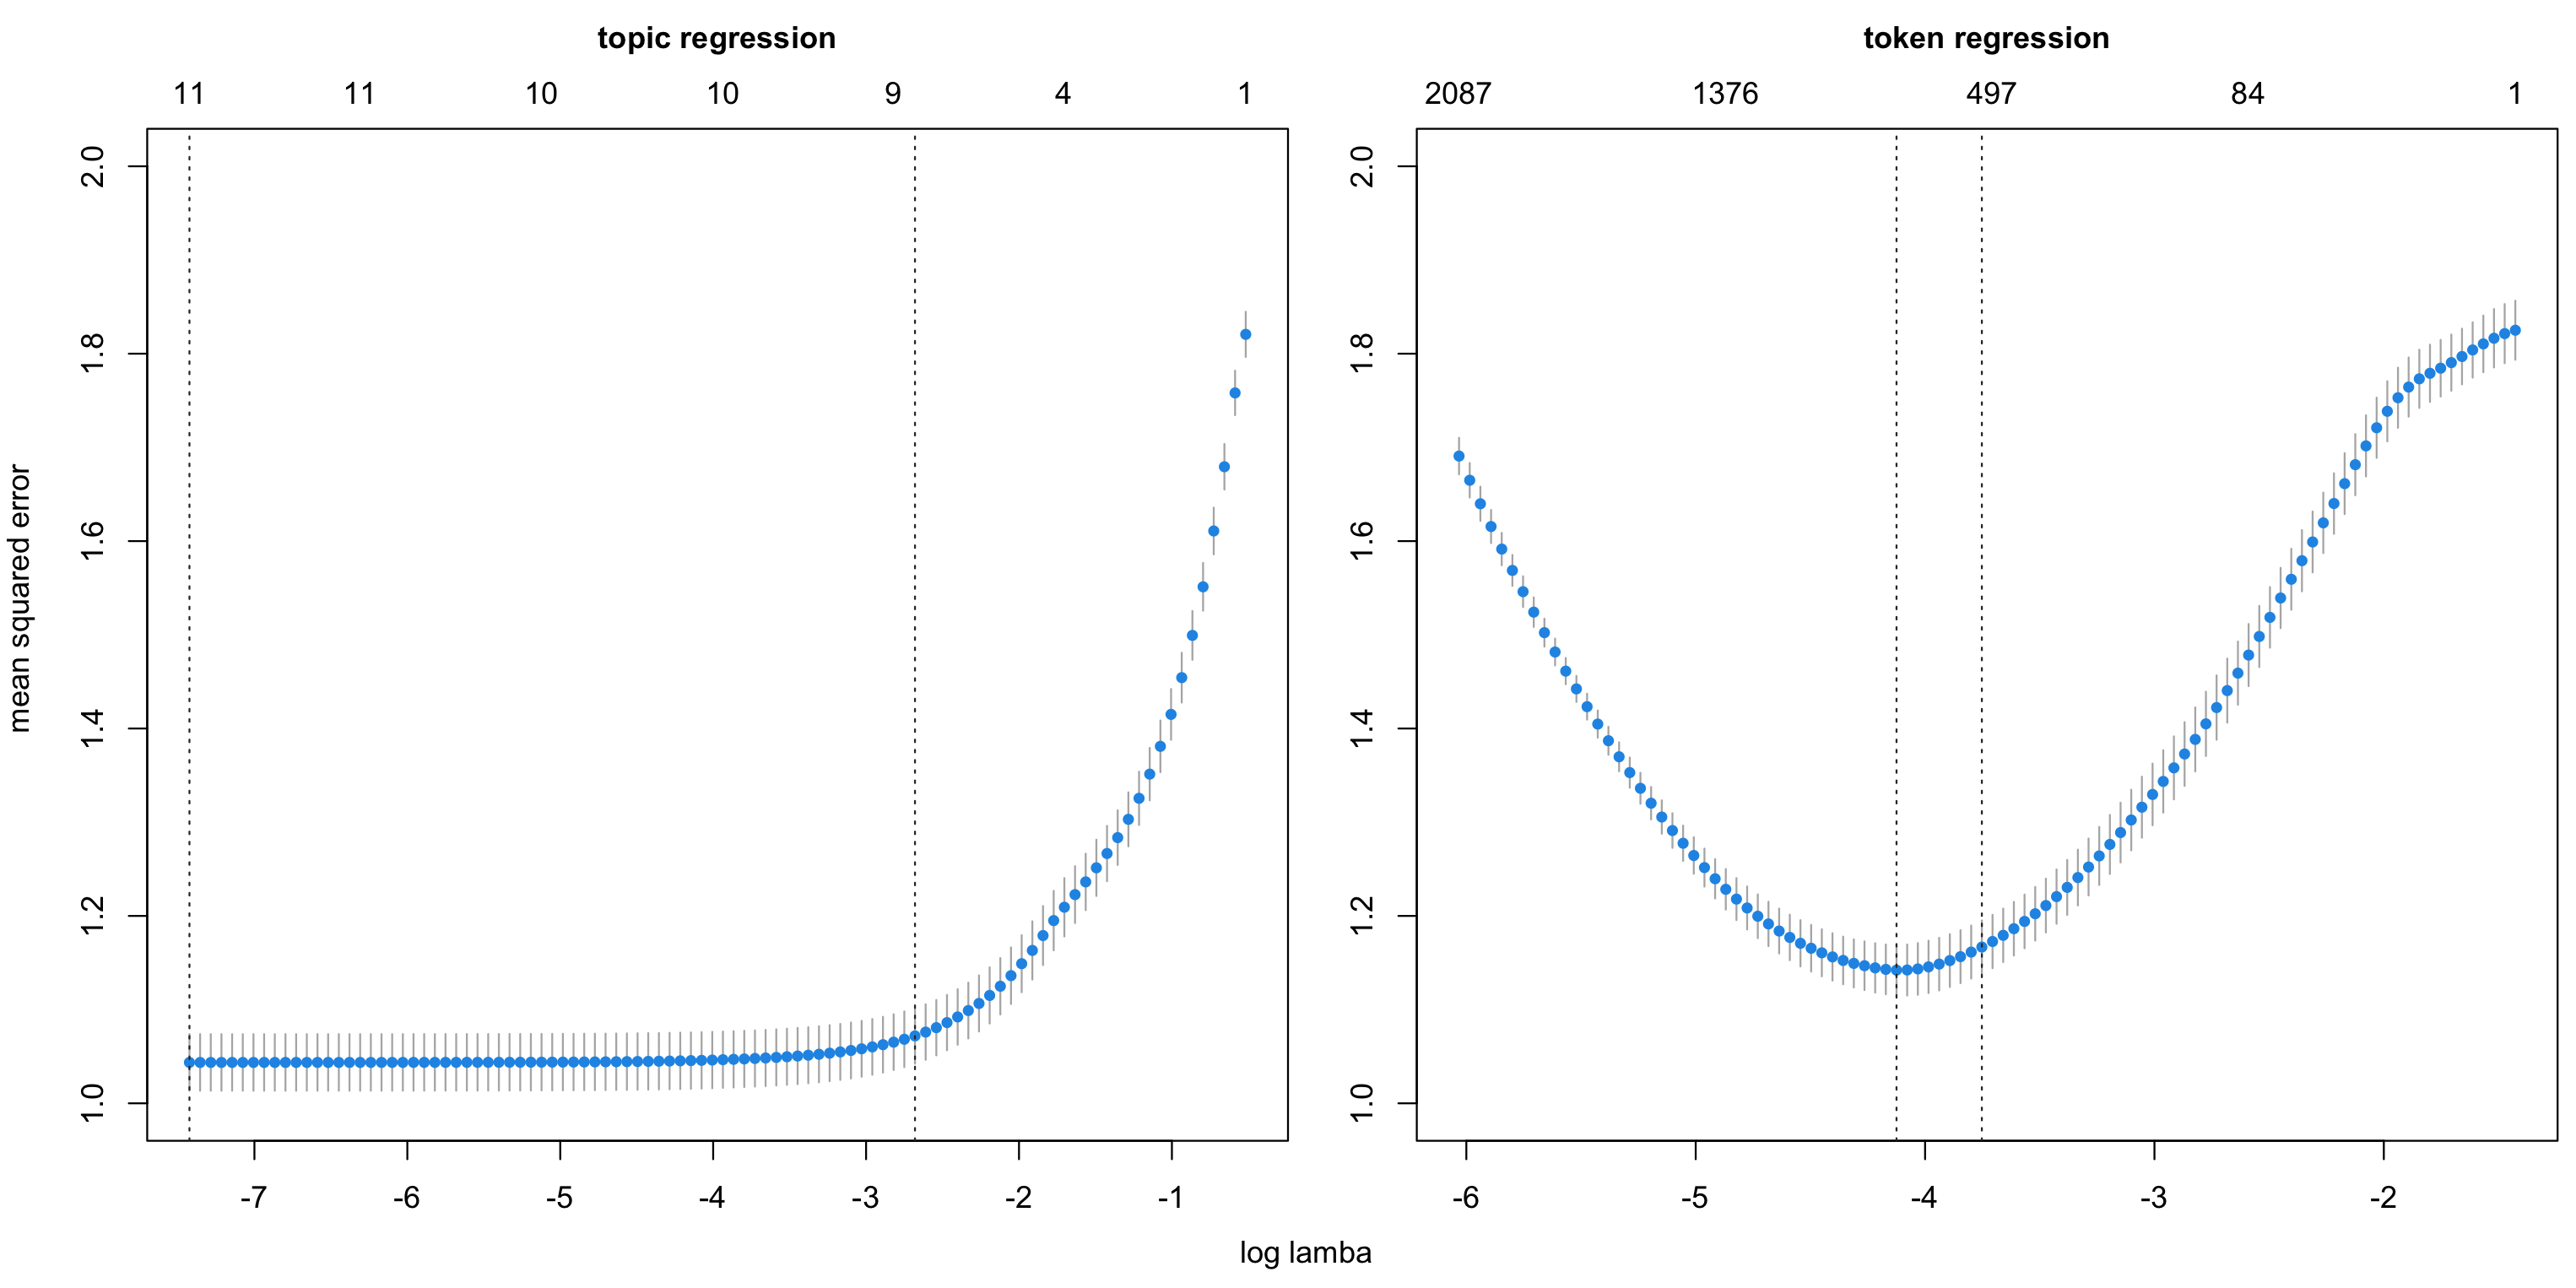

In [27]:
par(mfrow=c(1,2), mai=c(.3,.6,.7,.1), omi=c(.5,.2,0,0))
plot(regtopics.cv, ylim=c(1,2), xlab="", ylab="")
mtext("topic regression", font=2, line=2)
plot(regwords.cv, ylim=c(1,2), xlab="", ylab="")
mtext("token regression", font=2, line=2)
mtext(side=2, "mean squared error", outer=TRUE, line=0)
mtext(side=1, "log lamba", outer=TRUE, line=1)

Maximal out-of-sample R2s for each path:

In [28]:
max(1-regtopics.cv$cvm/regtopics.cv$cvm[1])
max(1-regwords.cv$cvm/regwords.cv$cvm[1])

[1] 0.4267784

[1] 0.3741854

# Multinomial text Regression 

This could get (computationally) intense, so we can start with setting up parallelization as much as possible.
`cl=NULL` would instead imply a serial run.

In [29]:
cl <- makeCluster(detectCores())

Here we pick a small `nlambda` for a fast example. You could pick a larger one if you had time.

In [30]:
fits <- dmr(cl, we8thereRatings, 
			we8thereCounts, bins=5,nlambda=10, lmr=1e-3)

Small thing, but note that it is often prudent to shut down clusters you set up.

In [31]:
stopCluster(cl)

We can plot the fit for a few individual terms:

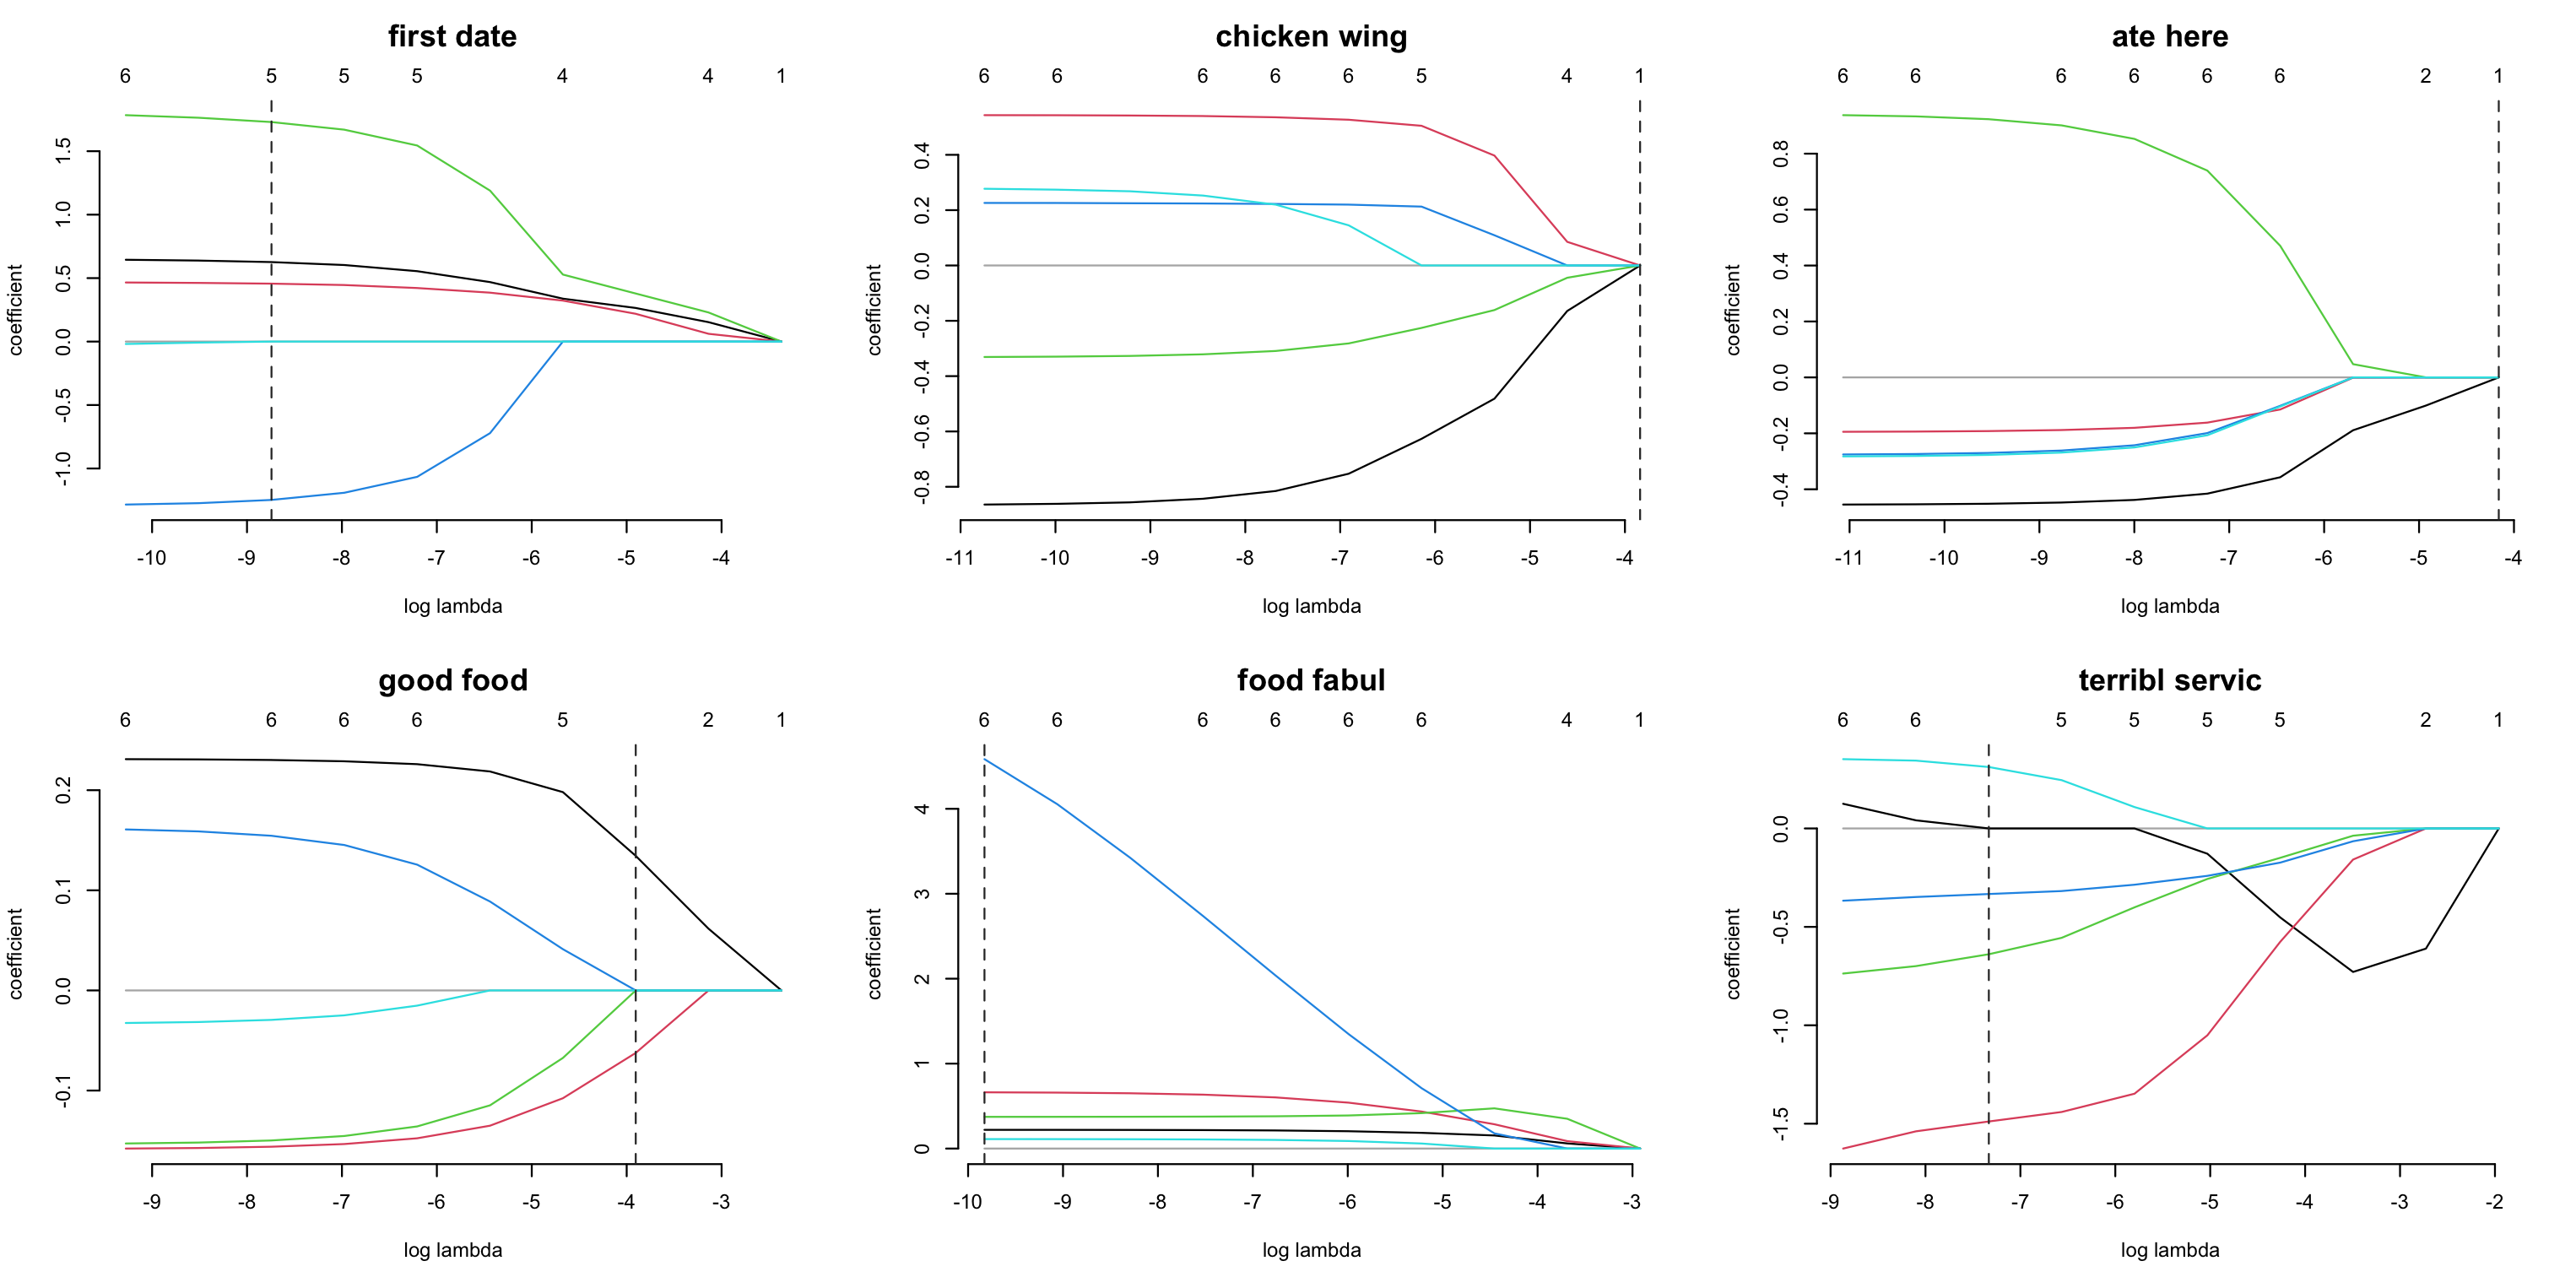

In [32]:
terms <- c("first date","chicken wing",
			"ate here", "good food",
			"food fabul","terribl servic")
par(mfrow=c(2,3))
for(j in terms)
{ 	plot(fits[[j]]); mtext(j,font=2,line=2) }

And extract coefficients:

In [33]:
B <- coef(fits)
B[,1:5]

6 x 5 sparse Matrix of class "dgCMatrix"
             veri good    go back  dine room dine experi  great food
intercept  -5.14953418 -4.7247330 -6.0361782   -5.555694 -9.69426558
Food        0.18245562  .          0.1221376    .         0.38892467
Service     0.01318399  .         -0.1920983    .         0.04234122
Value      -0.15418467 -0.1013329  .            .         0.17131793
Atmosphere -0.24317814  .          0.2205456    .         .         
Overall     0.24107687  .          .            .         0.34407390

See how sparse the loadings get:

In [34]:
mean(B[-1,]==0)

[1] 0.695303

Check out some of the biggest loadings on `overall`:

In [35]:
B[2,order(B[2,])[1:10]]
B[2,order(-B[2,])[1:10]]

food poison        hot food        old town      food bland      first date 
      -1.657717       -1.290374       -1.282910       -1.271656       -1.247614 
   chicken pork     more flavor qualiti ingredi    fri calamari       one worst 
      -1.132388       -1.111483       -1.109165       -1.104304       -1.096860

cannot wait      food fabul     food superb      best sushi     food awesom 
       5.393948        4.584591        4.559724        2.380941        2.161898 
outstand servic    around world   francisco bay     mouth water       best kept 
       1.983418        1.957251        1.911762        1.888860        1.782686

We can do a MNIR projection onto factors:

In [36]:
z <- srproj(B,we8thereCounts)
z[1:5,]

,Food,Service,Value,Atmosphere,Overall,m
1,0.46365320,0.27274793,0.39579271,-0.05736961,-0.23398473,8
2,0.00000000,-0.11664138,0.00000000,0.00000000,-0.16916446,2
5,0.00000000,-0.15458926,0.15263267,0.11693316,0.70421596,2
11,-0.03397961,0.09429418,0.08080977,0.03001613,0.21227263,11
12,0.73388490,0.09232618,0.10932085,0.03084464,0.03271238,8


Then fit a forward model to the factors:

In [37]:
summary(fwd <- lm(we8thereRatings$Overall ~ z)) 


Call:
lm(formula = we8thereRatings$Overall ~ z)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7239 -0.5929  0.1663  0.7257  3.9374 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.421197   0.020610 165.996  < 2e-16 ***
zFood       1.822132   0.078650  23.168  < 2e-16 ***
zService    3.026174   0.097451  31.053  < 2e-16 ***
zValue      2.537348   0.106949  23.725  < 2e-16 ***
zAtmosphere 1.026889   0.105121   9.769  < 2e-16 ***
zOverall    3.391911   0.083258  40.740  < 2e-16 ***
zm          0.006308   0.001149   5.491 4.16e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 6159 degrees of freedom
Multiple R-squared:  0.4495,	Adjusted R-squared:  0.449 
F-statistic: 838.2 on 6 and 6159 DF,  p-value: < 2.2e-16


It makes sense to truncate the forward predictions to our known range:

In [38]:
fwd$fitted[fwd$fitted<1] <- 1
fwd$fitted[fwd$fitted>5] <- 5

And now we can plot the fitted rating by the true rating:

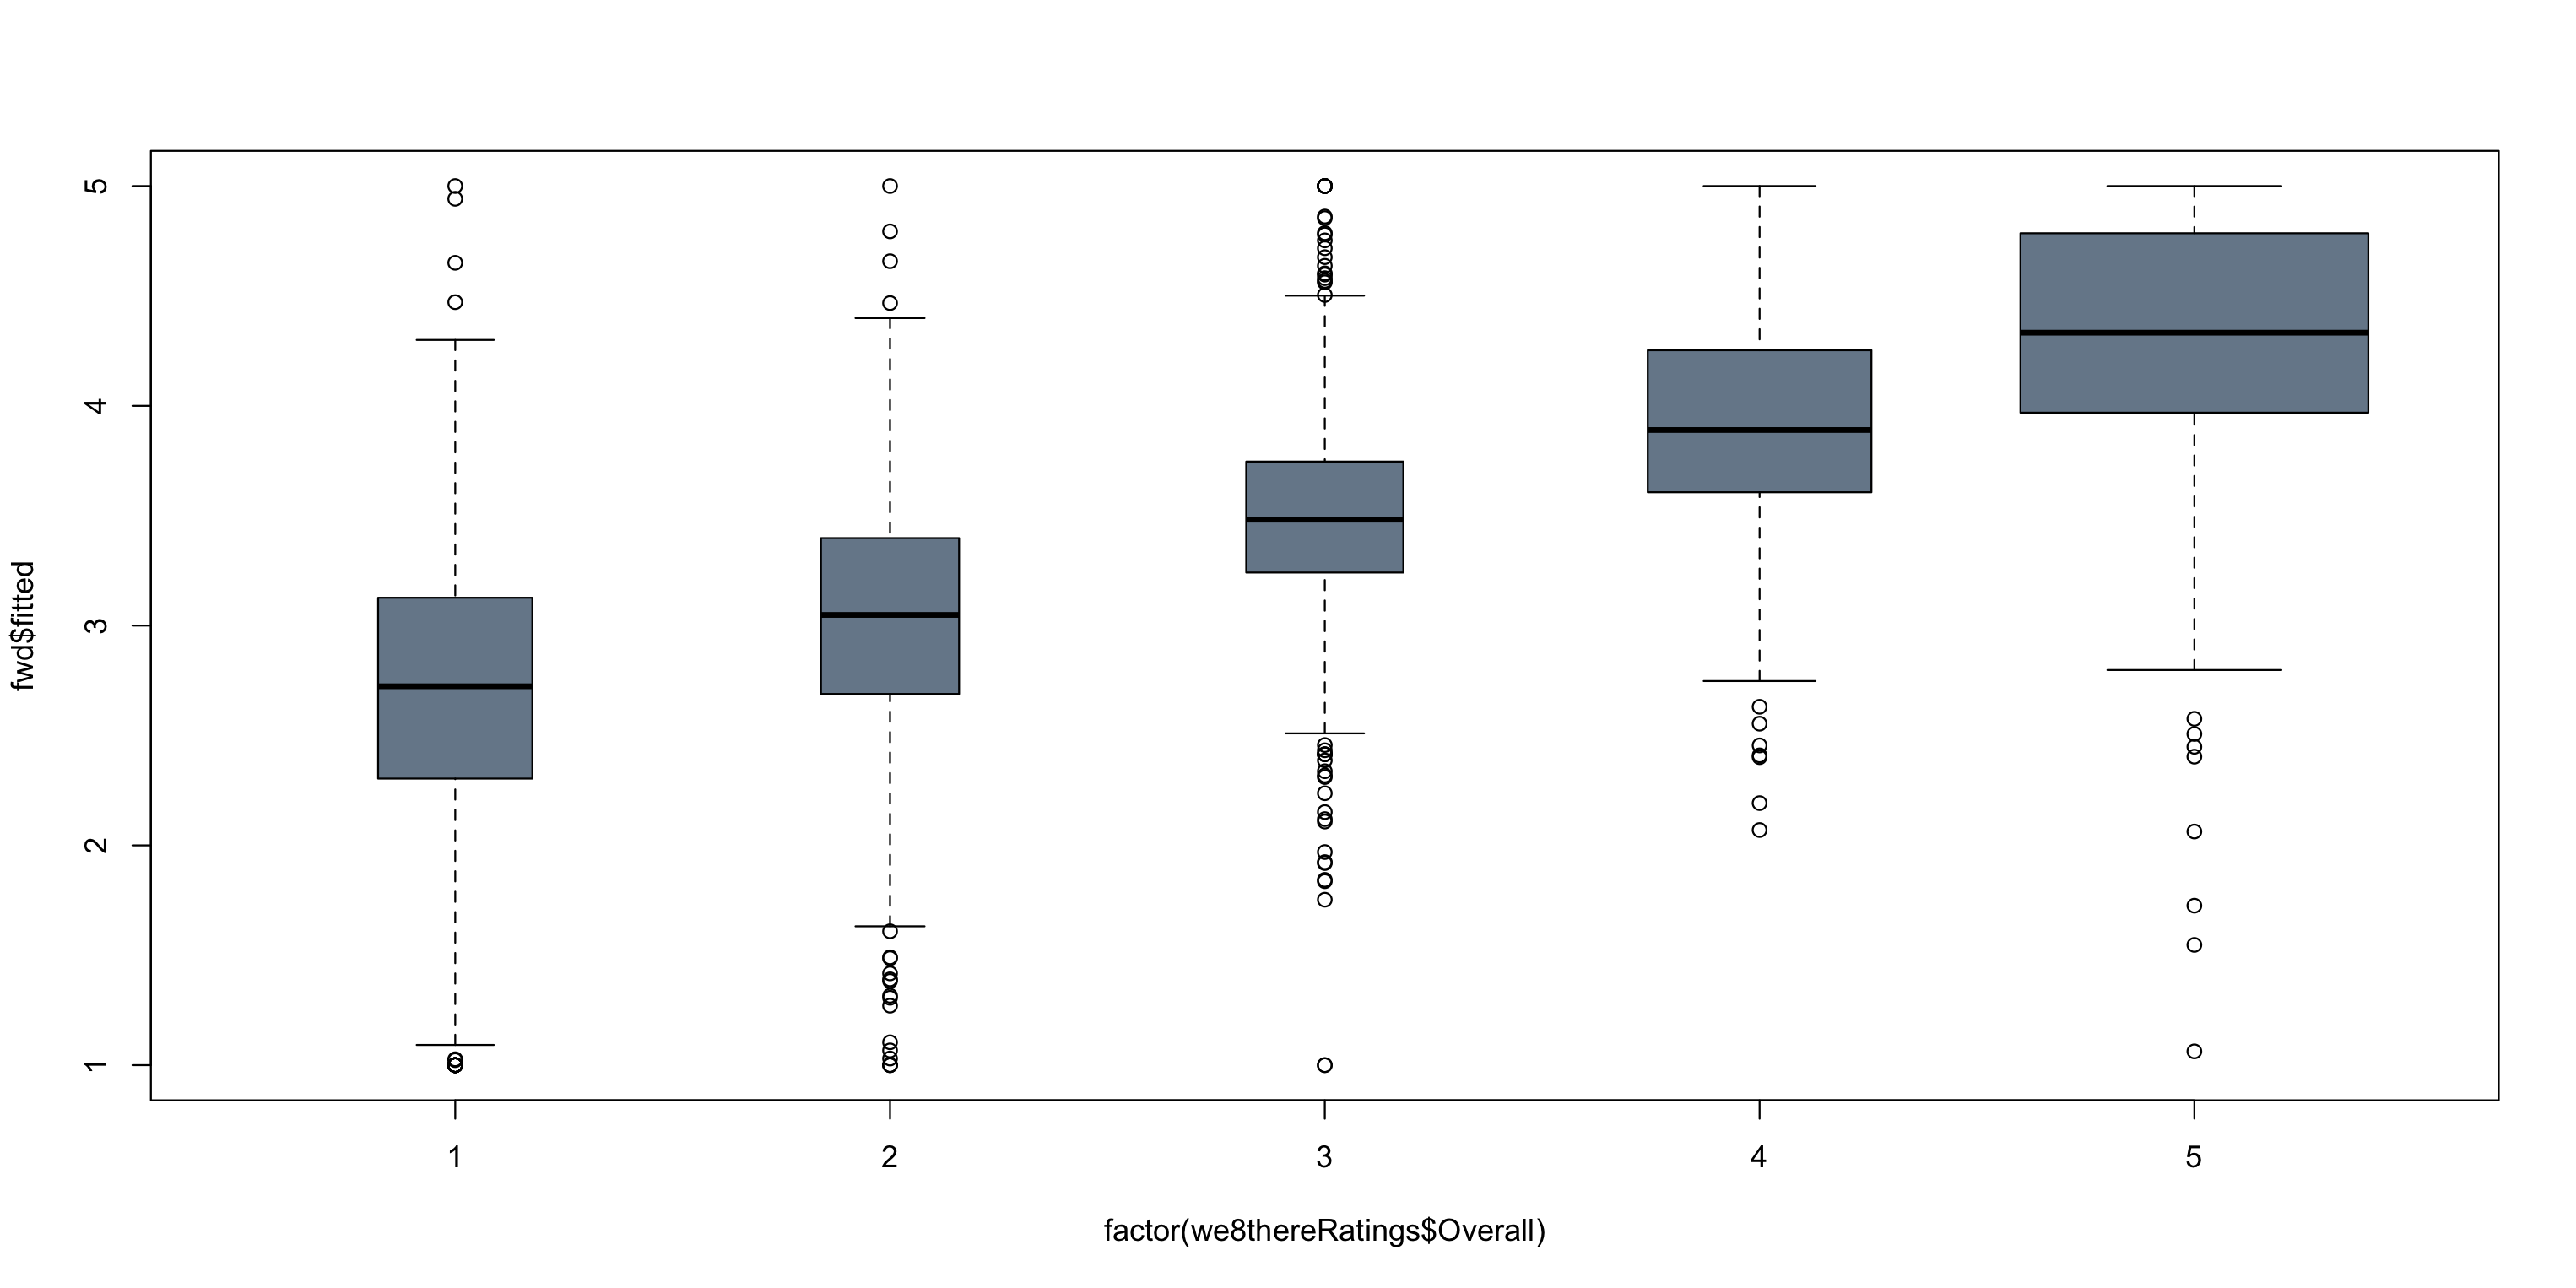

In [39]:
plot(fwd$fitted ~ factor(we8thereRatings$Overall), 
	varwidth=TRUE, col="lightslategrey")

#  Collaborative Filtering

For this we use LastFM play counts

In [40]:
lastfm <- read.csv("lastfm.csv")
lastfm$user <- factor(lastfm$user)
lastfm$artist <- factor(lastfm$artist)
lastfm$sex <- factor(lastfm$sex)
lastfm$country <- factor(lastfm$country)
head(lastfm)

,user,artist,sex,country
,<fct>,<fct>,<fct>,<fct>
1,1,red hot chili peppers,f,Germany
2,1,the black dahlia murder,f,Germany
3,1,goldfrapp,f,Germany
4,1,dropkick murphys,f,Germany
5,1,le tigre,f,Germany
6,1,schandmaul,f,Germany


Doing `topics` first (unlike the book):

In [41]:
x <- simple_triplet_matrix(i=as.numeric(lastfm$user), 
		j=as.numeric(lastfm$artist), v=rep(1,nrow(lastfm)), 
		nrow = nlevels(lastfm$user), ncol = nlevels(lastfm$artist),
        dimnames = list(levels(lastfm$user), levels(lastfm$artist)))

tpcs <- topics(x, K=5*(1:5), verb=1)


Estimating on a 15000 document collection.
Fit and Bayes Factor Estimation for K = 5 ... 25
log posterior increase: 10390.3, 2106.5, 905.9, 409.9, 167.7, 83.7, 30.3, 24.1, 12, 12.3, 13.4, 6.2, 6.3, 8.7, 9, 13, 1.6, 7.4, 0.7, 0.7, 0.4, 0.3, 0.1, done.
log BF( 5 ) = 343193.27
log posterior increase: 12081.7, 1655.4, 350.4, 153.4, 110, 57.5, 57.4, 13.3, 13.6, 20.8, 23.1, 33.1, 3.1, 1.5, 3.2, 6.6, 2.1, 0.7, 0.8, 0.7, 0.9, 0.8, 0.9, 0.9, 0.9, 1.3, 1.2, 7.9, 2.9, 2.2, 6.3, 3.8, 17.7, 48.7, 52.1, 33.6, 27.3, 22.8, 9.8, 5, 7, 3.3, 3.6, 1.2, 4.6, 0.9, 0.5, 1.1, 0.1, 0.3, 0.2, 0.1, 0.2, 0.3, done.
log BF( 10 ) = 523693.26
log posterior increase: 6018.3, 687.5, 161.3, 136.1, 56, 46.2, 28.9, 13.6, 34.2, 30.8, 30.5, 56.7, 50.7, 34.4, 16.3, 79.1, 36.6, 22.2, 27.7, 22.3, 11.7, 7.2, 7.8, 16.5, 18.7, 5.7, 2.3, 3.4, 2.5, 1.9, 6.1, 43.3, 3.4, 1.9, 2.4, 1, 1.2, 1.5, 2.7, 3, 0.4, 0.2, 0.3, 0.5, 0.6, 0.2, 0.2, 0.3, 0.6, 0.4, 0.5, 0.2, done.
log BF( 15 ) = 497743.73
log posterior increase: 2966.5, 689.1, 19

In [42]:
summary(tpcs)


Top 5 phrases by topic-over-null term lift (and usage %):

[1] 'guided by voices', 'animal collective', 'pavement', 'the magnetic fields', 'andrew bird' (13.1) 
[2] 'the rolling stones', 'the who', 'eric clapton', 'cream', 'john lennon' (12.4) 
[3] 'hypocrisy', 'turisas', 'equilibrium', 'sodom', 'norther' (12.3) 
[4] 'leona lewis', 'jennifer lopez', 'the pussycat dolls', 'céline dion', 'christina aguilera' (11.3) 
[5] 'tosca', 'the future sound of london', 'plaid', 'amon tobin', 'massive attack' (10.9) 
[6] 'nirvana', 'a perfect circle', 'soundgarden', 'audioslave', 'stone temple pilots' (8.9) 
[7] 'the pigeon detectives', 'franz ferdinand', 'arctic monkeys', 'the kooks', 'kaiser chiefs' (8.9) 
[8] 'red.jumpsuit.apparatus', 'simple plan', 'good charlotte', 'skillet', '30 seconds to mars' (8.4) 
[9] 'comeback kid', 'the bouncing souls', 'rancid', 'parkway drive', 'descendents' (6.9) 
[10] 'the game', 'talib kweli', 'mobb deep', 'nas', 'notorious b.i.g.' (6.8) 

Log Bayes factor and est

The old-school marketing way would be to use the `a-rules` package for association rules

In [43]:
#install.packages("arules")
library(arules)


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In any case, there is an entire ecosystem of packages around association rules.
But you need to first create a list of baskets: vectors of items by consumer.

Here's how we do the formatting here: split data into a list of artists for each user

In [44]:
playlists <- split(x=lastfm$artist, f=lastfm$user)

Remove artist repetition in these lists

In [45]:
playlists <- lapply(playlists, unique)

Now tell R to treat this as a special arules `transactions` class.

In [46]:
playtrans <- as(playlists, "transactions")

Now we can apply the actual `apriori` algorithm.
We can add a list of arguments called `parameter`.  Here, we look at only rules with support > .01 & confidence >.5 & length (# artists) <= 3

In [47]:
musicrules <- apriori(playtrans, 
	parameter=list(support=.01, confidence=.5, maxlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1004 item(s), 15000 transaction(s)] done [0.04s].
sorting and recoding items ... [655 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(playtrans, parameter = list(support = 0.01, confidence = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.02s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Now we can check out the rules:

In [48]:
inspect(musicrules)

     lhs                                    rhs            support   
[1]  {t.i.}                              => {kanye west}   0.01040000
[2]  {the pussycat dolls}                => {rihanna}      0.01040000
[3]  {the fray}                          => {coldplay}     0.01126667
[4]  {sonata arctica}                    => {nightwish}    0.01346667
[5]  {judas priest}                      => {iron maiden}  0.01353333
[6]  {the kinks}                         => {the beatles}  0.01360000
[7]  {travis}                            => {coldplay}     0.01373333
[8]  {the flaming lips}                  => {radiohead}    0.01306667
[9]  {megadeth}                          => {metallica}    0.01626667
[10] {simon & garfunkel}                 => {the beatles}  0.01540000
[11] {broken social scene}               => {radiohead}    0.01506667
[12] {blur}                              => {radiohead}    0.01753333
[13] {keane}                             => {coldplay}     0.02226667
[14] {snow patrol}  

And also investigate any subset we want.

In [49]:
inspect(subset(musicrules, subset=lift > 5))
inspect(subset(musicrules, subset=confidence > 0.6))
inspect(subset(musicrules, subset=support > .02 & confidence > 0.6))
inspect(subset(musicrules, subset=lhs%in%"t.i."))

    lhs                         rhs            support    confidence coverage  
[1] {t.i.}                   => {kanye west}   0.01040000 0.5672727  0.01833333
[2] {the pussycat dolls}     => {rihanna}      0.01040000 0.5777778  0.01800000
[3] {sonata arctica}         => {nightwish}    0.01346667 0.5101010  0.02640000
[4] {judas priest}           => {iron maiden}  0.01353333 0.5075000  0.02666667
[5] {led zeppelin,the doors} => {pink floyd}   0.01066667 0.5970149  0.01786667
[6] {pink floyd,the doors}   => {led zeppelin} 0.01066667 0.5387205  0.01980000
    lift      count
[1]  8.854413 156  
[2] 13.415893 156  
[3]  8.236292 202  
[4]  8.562992 203  
[5]  5.689469 160  
[6]  6.802027 160  
    lhs                                    rhs           support    confidence
[1] {keane}                             => {coldplay}    0.02226667 0.6374046 
[2] {radiohead,snow patrol}             => {coldplay}    0.01006667 0.6344538 
[3] {oasis,the killers}                 => {coldplay}    0.0111